In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata as an
import sklearn.metrics
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture as GMM
from scipy.stats import norm

/Users/jonathanrub/miniforge3/envs/scDL/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#adata=sc.read(results_file_post)
#adata.uns['log1p'] = {"base":None}

Set up out properties

In [3]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

/Users/jonathanrub/miniforge3/envs/scDL/lib/python3.8/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/jonathanrub/miniforge3/envs/scDL/lib/python3.8/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/jonathanrub/miniforge3/envs/scDL/lib/python3.8/site-pac

scanpy==1.9.3 anndata==0.9.1 umap==0.5.3 numpy==1.21.5 scipy==1.7.3 pandas==1.5.3 scikit-learn==1.0.2 statsmodels==0.13.5 python-igraph==0.10.4 pynndescent==0.5.10


/Users/jonathanrub/miniforge3/envs/scDL/lib/python3.8/site-packages/umap/umap_.py:660: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()


In [4]:
#%matplotlib inline

Set scanpy out-files

In [5]:
writeDir = "write/"

fileName = "pdacPdxMrtx"

resultsFileQC = writeDir + fileName + '_QC.h5ad' 


Set figure parameters

In [6]:
sc.set_figure_params(scanpy=True, dpi=100, dpi_save=150, fontsize=10, format='png')
sc.settings.figdir = "figures/" + fileName + "/"
figName = fileName

read input file

In [7]:
inDir = 'data/'
#inputFile = f'{inDir}/.txt'
#inMetaFile = f'{inDir}/.txt'

In [8]:
adata = sc.read_10x_h5(f"{inDir}PC69_MRTX_Lane1.h5", gex_only=False)
adata

reading data/PC69_MRTX_Lane1.h5
 (0:00:00)


/Users/jonathanrub/miniforge3/envs/scDL/lib/python3.8/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


AnnData object with n_obs × n_vars = 7434 × 68889
    var: 'gene_ids', 'feature_types', 'genome'

In [9]:
adata.var

,gene_ids,feature_types,genome
GRCh38_MIR1302-2HG,GRCh38_ENSG00000243485,Gene Expression,GRCh38
GRCh38_FAM138A,GRCh38_ENSG00000237613,Gene Expression,GRCh38
GRCh38_OR4F5,GRCh38_ENSG00000186092,Gene Expression,GRCh38
GRCh38_AL627309.1,GRCh38_ENSG00000238009,Gene Expression,GRCh38
GRCh38_AL627309.3,GRCh38_ENSG00000239945,Gene Expression,GRCh38
...,...,...,...
mm10___AC234645.1,mm10___ENSMUSG00000095019,Gene Expression,mm10
mm10___AC149090.1,mm10___ENSMUSG00000095041,Gene Expression,mm10
MRTX1_B0251,MRTX1,Antibody Capture,
MRTX2_B0252,MRTX2,Antibody Capture,


In [10]:
numGenes = 3

hto = adata[:,-numGenes:]
adata = adata[:,:-numGenes]
adata.obs = pd.DataFrame(hto.X.todense(), columns=hto.var_names, index=adata.obs.index)

/Users/jonathanrub/miniforge3/envs/scDL/lib/python3.8/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [11]:
adata.obs

,MRTX1_B0251,MRTX2_B0252,MRTX3_B0253
AAACCCAAGGAAGTAG-1,26.0,15.0,227.0
AAACCCACAGAAATTG-1,552.0,12.0,12.0
AAACCCAGTACAGCGA-1,2930.0,31.0,19.0
AAACCCAGTTAGGACG-1,31.0,1316.0,18.0
AAACCCAGTTCCTTGC-1,1281.0,11.0,19.0
...,...,...,...
TTTGTTGGTAACATAG-1,655.0,16.0,13.0
TTTGTTGGTAGTTCCA-1,360.0,21.0,23.0
TTTGTTGGTGGAGAAA-1,291.0,472.0,172.0
TTTGTTGGTGTGAATA-1,1668.0,10.0,44.0


In [12]:
adata.var_names_make_unique()
adata.obs_names_make_unique()

In [13]:
adata.obs 

,MRTX1_B0251,MRTX2_B0252,MRTX3_B0253
AAACCCAAGGAAGTAG-1,26.0,15.0,227.0
AAACCCACAGAAATTG-1,552.0,12.0,12.0
AAACCCAGTACAGCGA-1,2930.0,31.0,19.0
AAACCCAGTTAGGACG-1,31.0,1316.0,18.0
AAACCCAGTTCCTTGC-1,1281.0,11.0,19.0
...,...,...,...
TTTGTTGGTAACATAG-1,655.0,16.0,13.0
TTTGTTGGTAGTTCCA-1,360.0,21.0,23.0
TTTGTTGGTGGAGAAA-1,291.0,472.0,172.0
TTTGTTGGTGTGAATA-1,1668.0,10.0,44.0


In [14]:
adata.var

,gene_ids,feature_types,genome
GRCh38_MIR1302-2HG,GRCh38_ENSG00000243485,Gene Expression,GRCh38
GRCh38_FAM138A,GRCh38_ENSG00000237613,Gene Expression,GRCh38
GRCh38_OR4F5,GRCh38_ENSG00000186092,Gene Expression,GRCh38
GRCh38_AL627309.1,GRCh38_ENSG00000238009,Gene Expression,GRCh38
GRCh38_AL627309.3,GRCh38_ENSG00000239945,Gene Expression,GRCh38
...,...,...,...
mm10___AC124606.1,mm10___ENSMUSG00000095523,Gene Expression,mm10
mm10___AC133095.2,mm10___ENSMUSG00000095475,Gene Expression,mm10
mm10___AC133095.1,mm10___ENSMUSG00000094855,Gene Expression,mm10
mm10___AC234645.1,mm10___ENSMUSG00000095019,Gene Expression,mm10


# Start QC
investigate highest expressed genes

normalizing counts per cell
    finished (0:00:00)


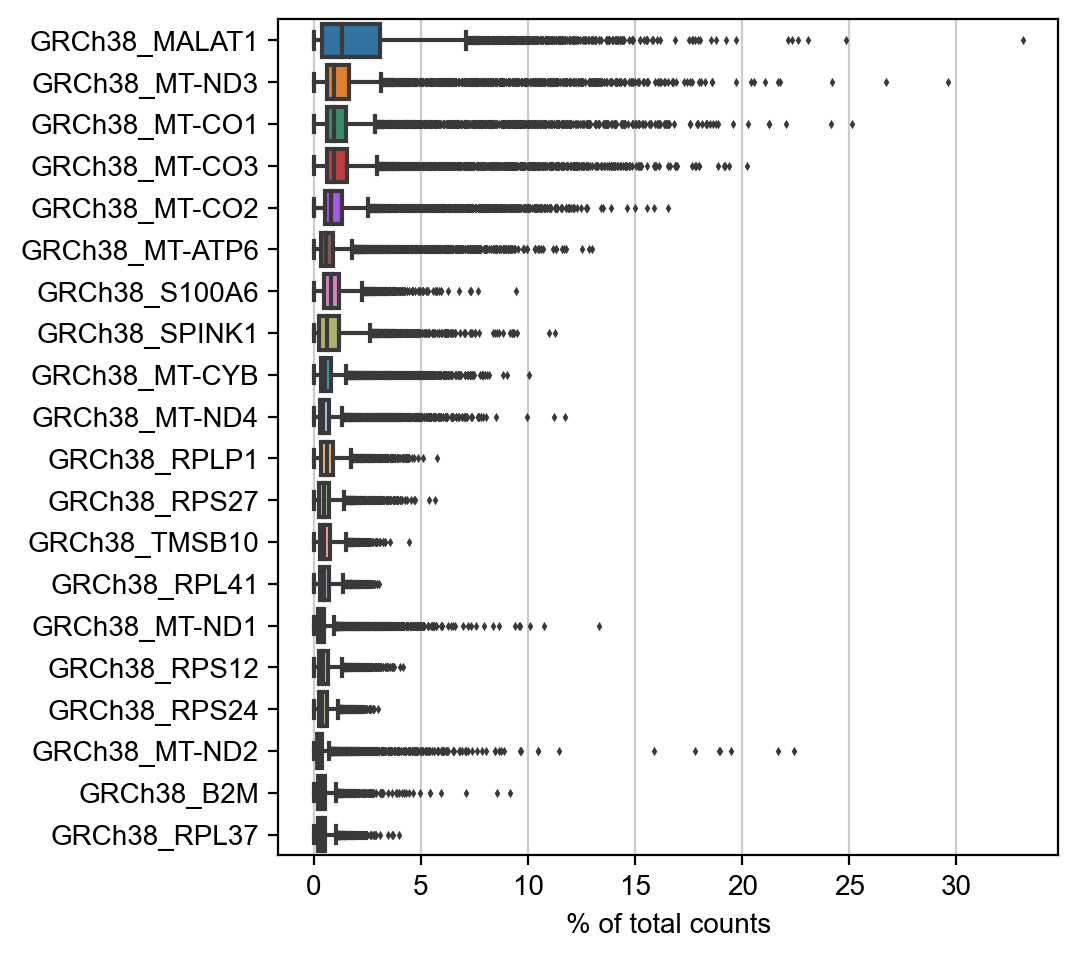

In [15]:
sc.pl.highest_expr_genes(adata, n_top=20, )

/var/folders/nc/t9t85q_94q7g4tf0gz83qts40000gn/T/ipykernel_66941/1029756660.py:22: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


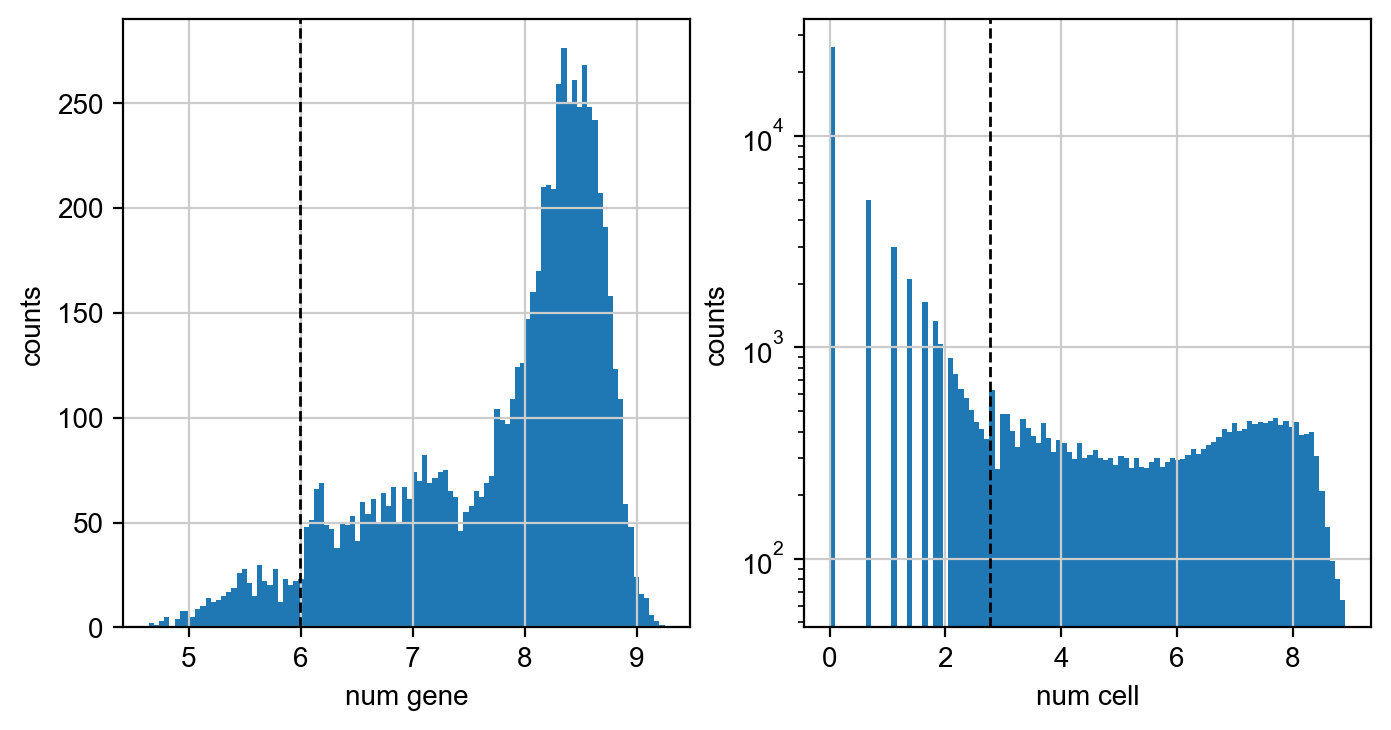

In [16]:
valX = adata.X>0
minGenes=400
minCells=15

fig, axs = plt.subplots(1, 2, figsize=(8, 4))

numCellwExp = valX.sum(axis=1)
axs[0].hist(np.log(numCellwExp), bins=100)#, log=True)
axs[0].axvline(np.log(minGenes), color='k', linestyle='dashed', linewidth=1)
axs[0].set_xlabel('num gene')
axs[0].set_ylabel('counts')

numGeneswExp = valX.sum(axis=0).T
axs[1].hist(np.log(numGeneswExp+1), bins=100, log=True)
axs[1].axvline(np.log(minCells+1), color='k', linestyle='dashed', linewidth=1)
#axs[0,1].axvline(np.log(600), color='k', linestyle='dashed', linewidth=1)
#axs[0,1].axvline(np.log(4000), color='k', linestyle='dashed', linewidth=1)
#axs[0,1].set_title('Gene means counts')
axs[1].set_xlabel('num cell')
axs[1].set_ylabel('counts')

fig.show()

In [17]:
sc.pp.filter_cells(adata, min_genes = minGenes)
sc.pp.filter_genes(adata, min_cells = minCells)

filtered out 417 cells that have less than 400 genes expressed
filtered out 45100 genes that are detected in less than 15 cells


In [18]:
adata = adata[:,np.logical_not(adata.var_names=="GRCh38_MALAT1")]

## Mouse QC

In [19]:
adata.var

,gene_ids,feature_types,genome,n_cells
GRCh38_AL627309.5,GRCh38_ENSG00000241860,Gene Expression,GRCh38,102
GRCh38_LINC01409,GRCh38_ENSG00000237491,Gene Expression,GRCh38,423
GRCh38_LINC01128,GRCh38_ENSG00000228794,Gene Expression,GRCh38,386
GRCh38_LINC00115,GRCh38_ENSG00000225880,Gene Expression,GRCh38,72
GRCh38_FAM41C,GRCh38_ENSG00000230368,Gene Expression,GRCh38,52
...,...,...,...,...
mm10___mt-Co3,mm10___ENSMUSG00000064358,Gene Expression,mm10,88
mm10___mt-Nd4l,mm10___ENSMUSG00000065947,Gene Expression,mm10,15
mm10___mt-Nd4,mm10___ENSMUSG00000064363,Gene Expression,mm10,45
mm10___mt-Nd5,mm10___ENSMUSG00000064367,Gene Expression,mm10,27


In [20]:
adata.var['mm'] = adata.var_names.str.startswith('mm10___') 
sc.pp.calculate_qc_metrics(adata, qc_vars=['mm'], log1p = False, inplace=True)

/var/folders/nc/t9t85q_94q7g4tf0gz83qts40000gn/T/ipykernel_66941/1039509494.py:1: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['mm'] = adata.var_names.str.startswith('mm10___')


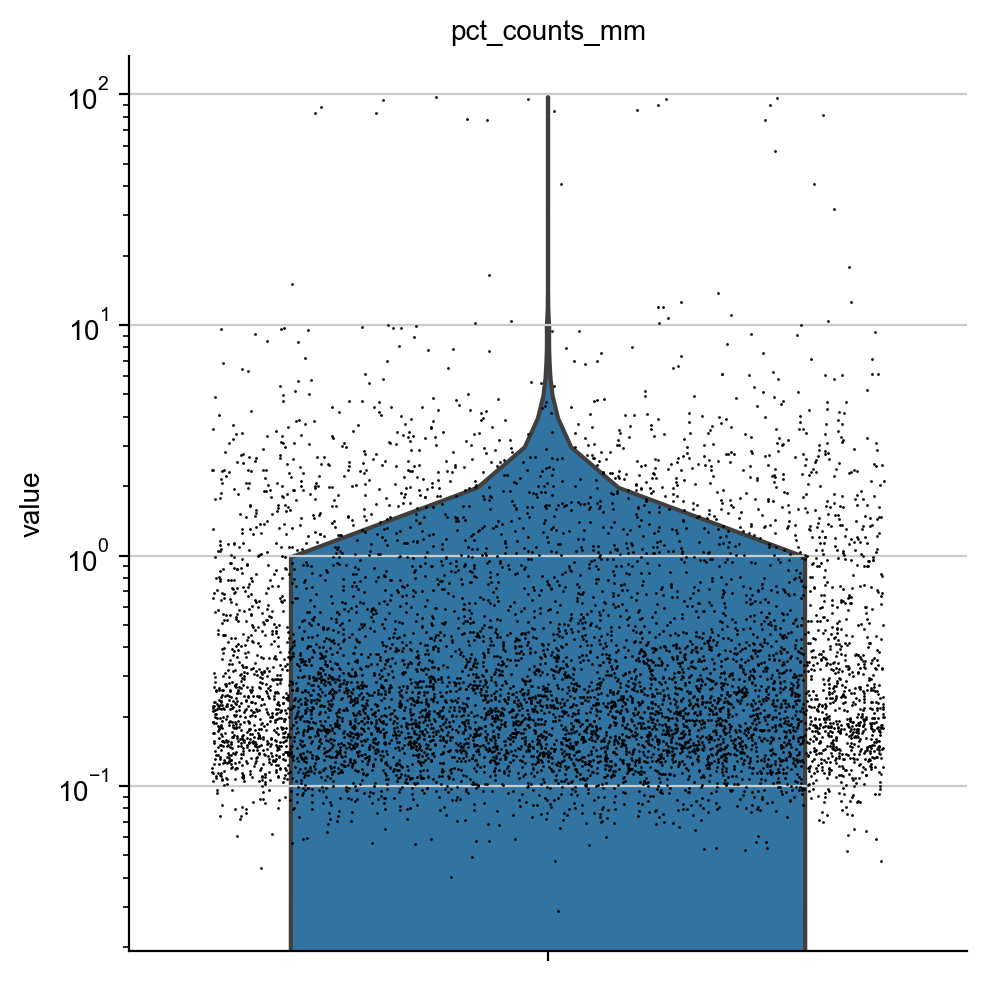

In [21]:
sc.pl.violin(adata, ['pct_counts_mm'], jitter=0.4, multi_panel=True, log=True)

In [22]:
sum(adata.obs.pct_counts_mm < 1)/len(adata.obs)

0.8483682485392617

In [23]:
adata = adata[adata.obs.pct_counts_mm < 1, :]
adata = adata[:,adata.var_names.str.startswith('GRCh38_')]
adata

View of AnnData object with n_obs × n_vars = 5953 × 22037
    obs: 'MRTX1_B0251', 'MRTX2_B0252', 'MRTX3_B0253', 'n_genes', 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mm', 'pct_counts_mm'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mm', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [24]:
adata.var_names = [g.split("38_")[1] for g in adata.var_names]
adata.var

,gene_ids,feature_types,genome,n_cells,mm,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts
AL627309.5,GRCh38_ENSG00000241860,Gene Expression,GRCh38,102,False,102,0.014821,98.546387,104.0
LINC01409,GRCh38_ENSG00000237491,Gene Expression,GRCh38,423,False,423,0.068548,93.971783,481.0
LINC01128,GRCh38_ENSG00000228794,Gene Expression,GRCh38,386,False,386,0.060425,94.499074,424.0
LINC00115,GRCh38_ENSG00000225880,Gene Expression,GRCh38,72,False,72,0.010546,98.973920,74.0
FAM41C,GRCh38_ENSG00000230368,Gene Expression,GRCh38,52,False,52,0.007696,99.258943,54.0
...,...,...,...,...,...,...,...,...,...
AL354822.1,GRCh38_ENSG00000278384,Gene Expression,GRCh38,318,False,318,0.048311,95.468149,339.0
AL592183.1,GRCh38_ENSG00000273748,Gene Expression,GRCh38,1676,False,1676,0.340601,76.115149,2390.0
AC240274.1,GRCh38_ENSG00000271254,Gene Expression,GRCh38,57,False,57,0.008266,99.187687,58.0
AC004556.3,GRCh38_ENSG00000276345,Gene Expression,GRCh38,15,False,15,0.002280,99.786233,16.0


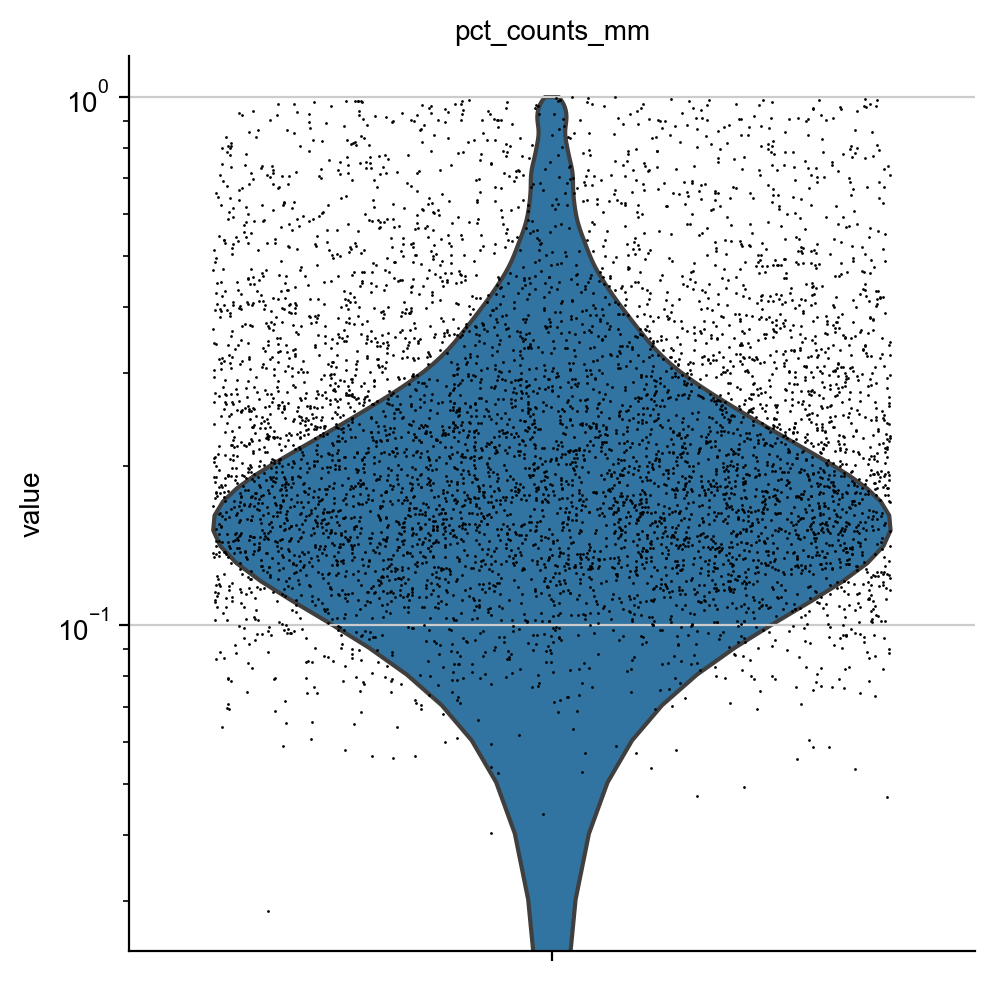

In [25]:
sc.pl.violin(adata, ['pct_counts_mm'],jitter=0.4, multi_panel=True, log = True)

In [26]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of human mitochondrial genes as 'hMT'
#adata.var['mmt'] = adata.var_names.str.startswith('mm10___mt-')  # annotate the group of mouse mitochondrial genes as 'mmt'

sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
#sc.pp.calculate_qc_metrics(adata, qc_vars=['mmt'], percent_top=None, log1p=False, inplace=True)

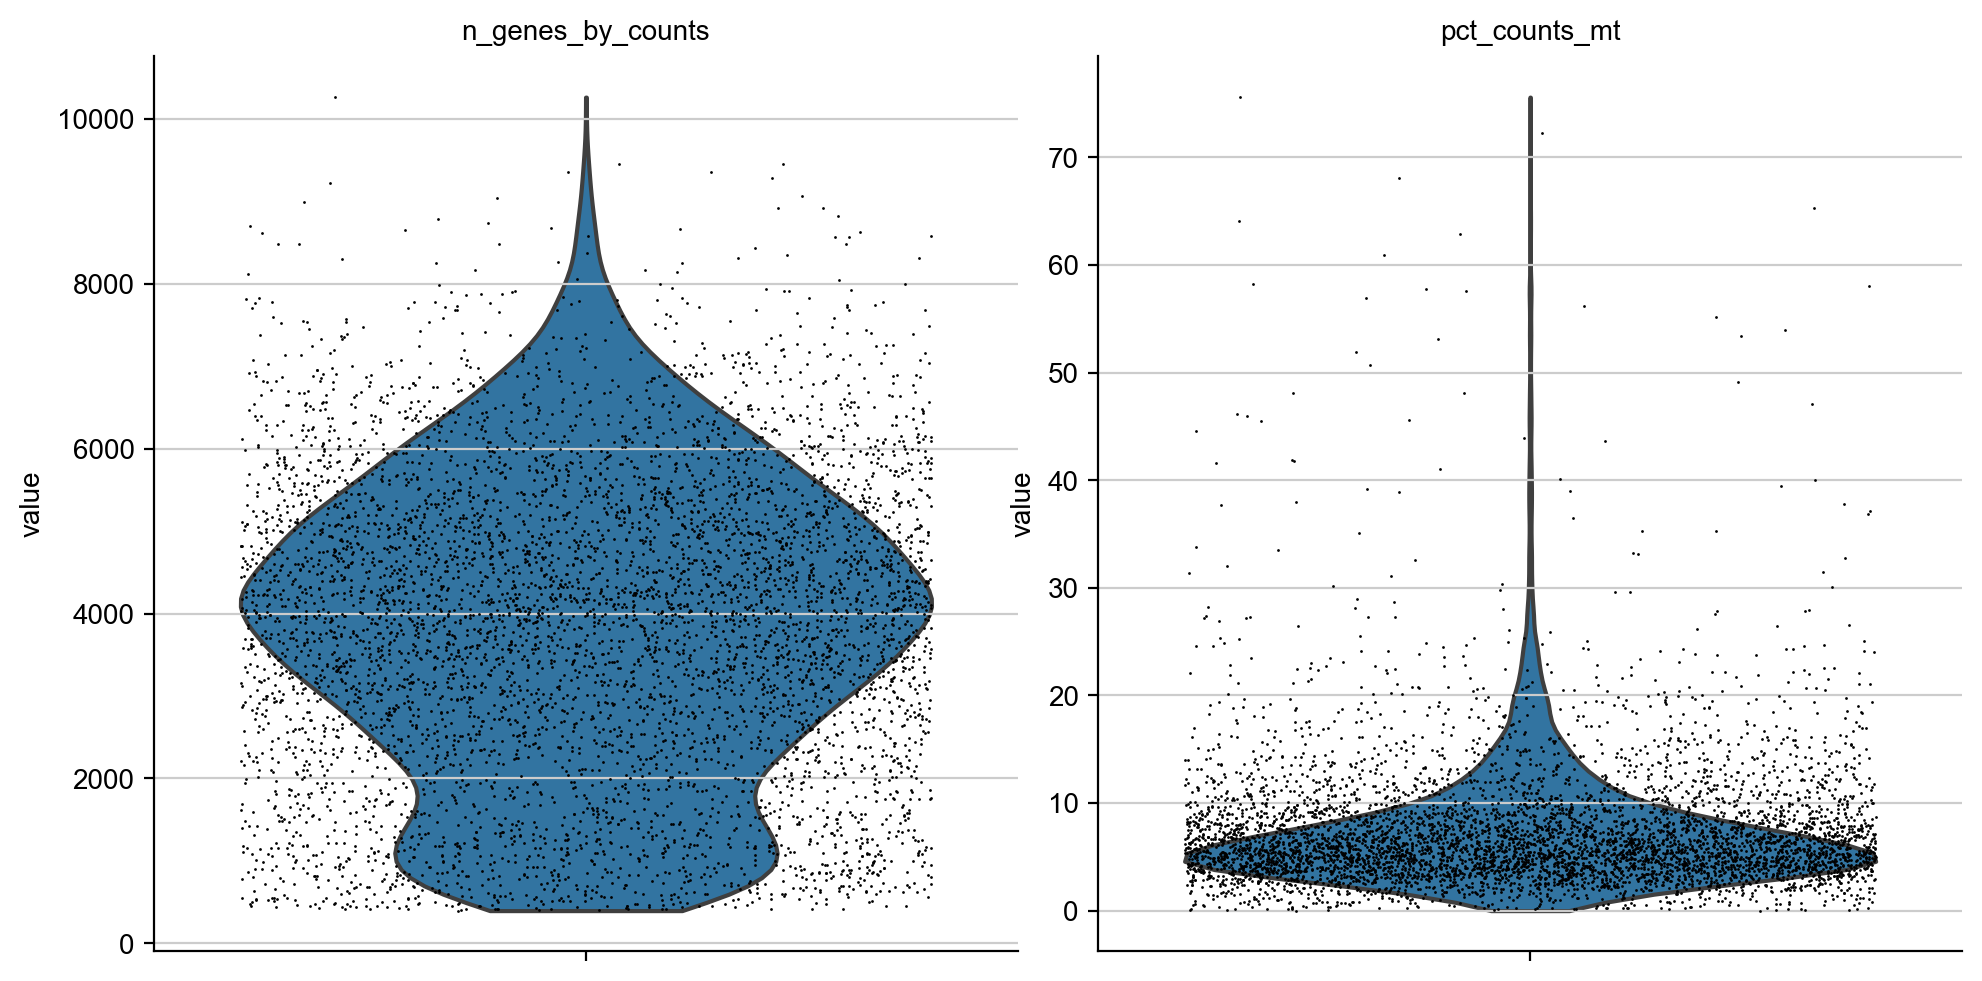

In [27]:
sc.pl.violin(adata, ["n_genes_by_counts", "pct_counts_mt"], #pct_counts_mmt
             jitter=0.4, multi_panel=True)

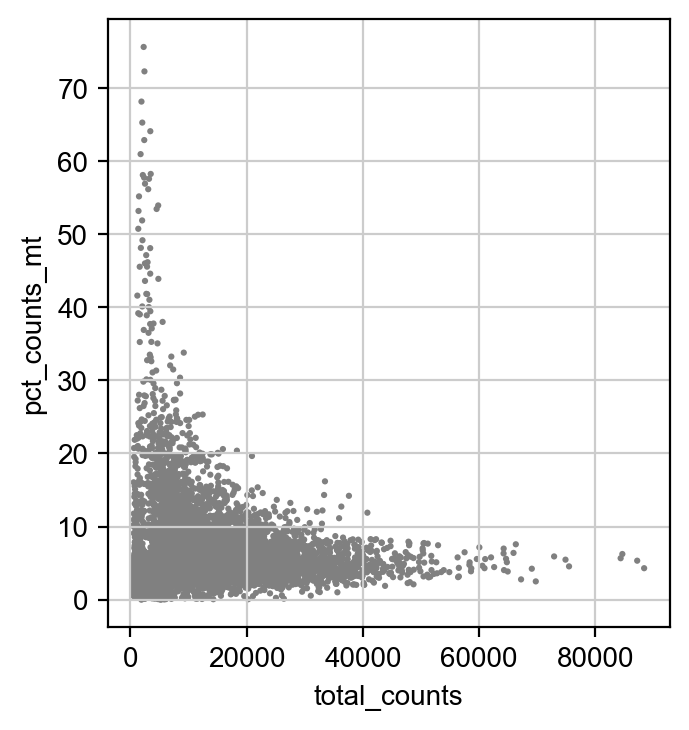

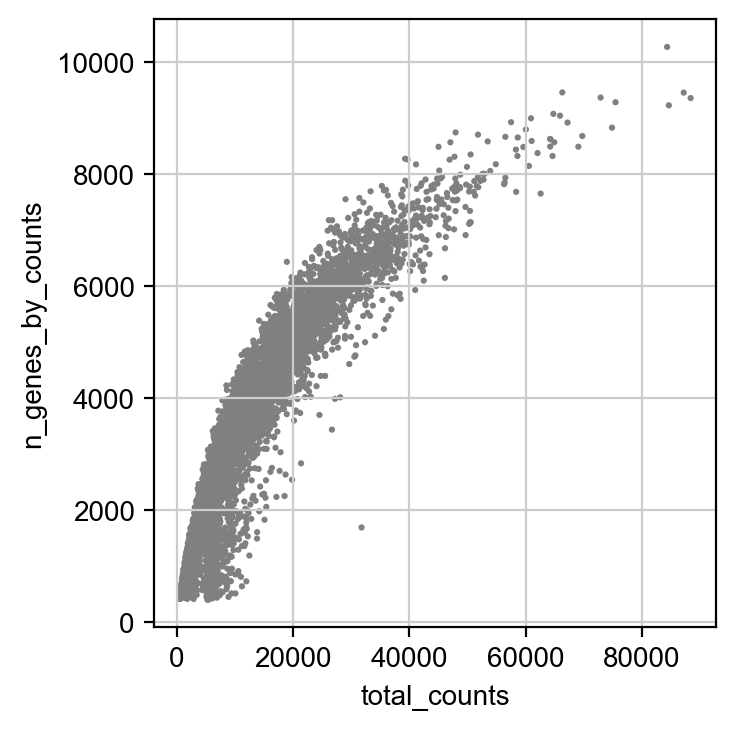

In [28]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

remove cells that have too much mito or could be doublets

In [29]:
adata = adata[adata.obs.n_genes_by_counts < 6000, :]
adata = adata[adata.obs.total_counts < 30000, :]
adata = adata[adata.obs.pct_counts_mt < 15, :]

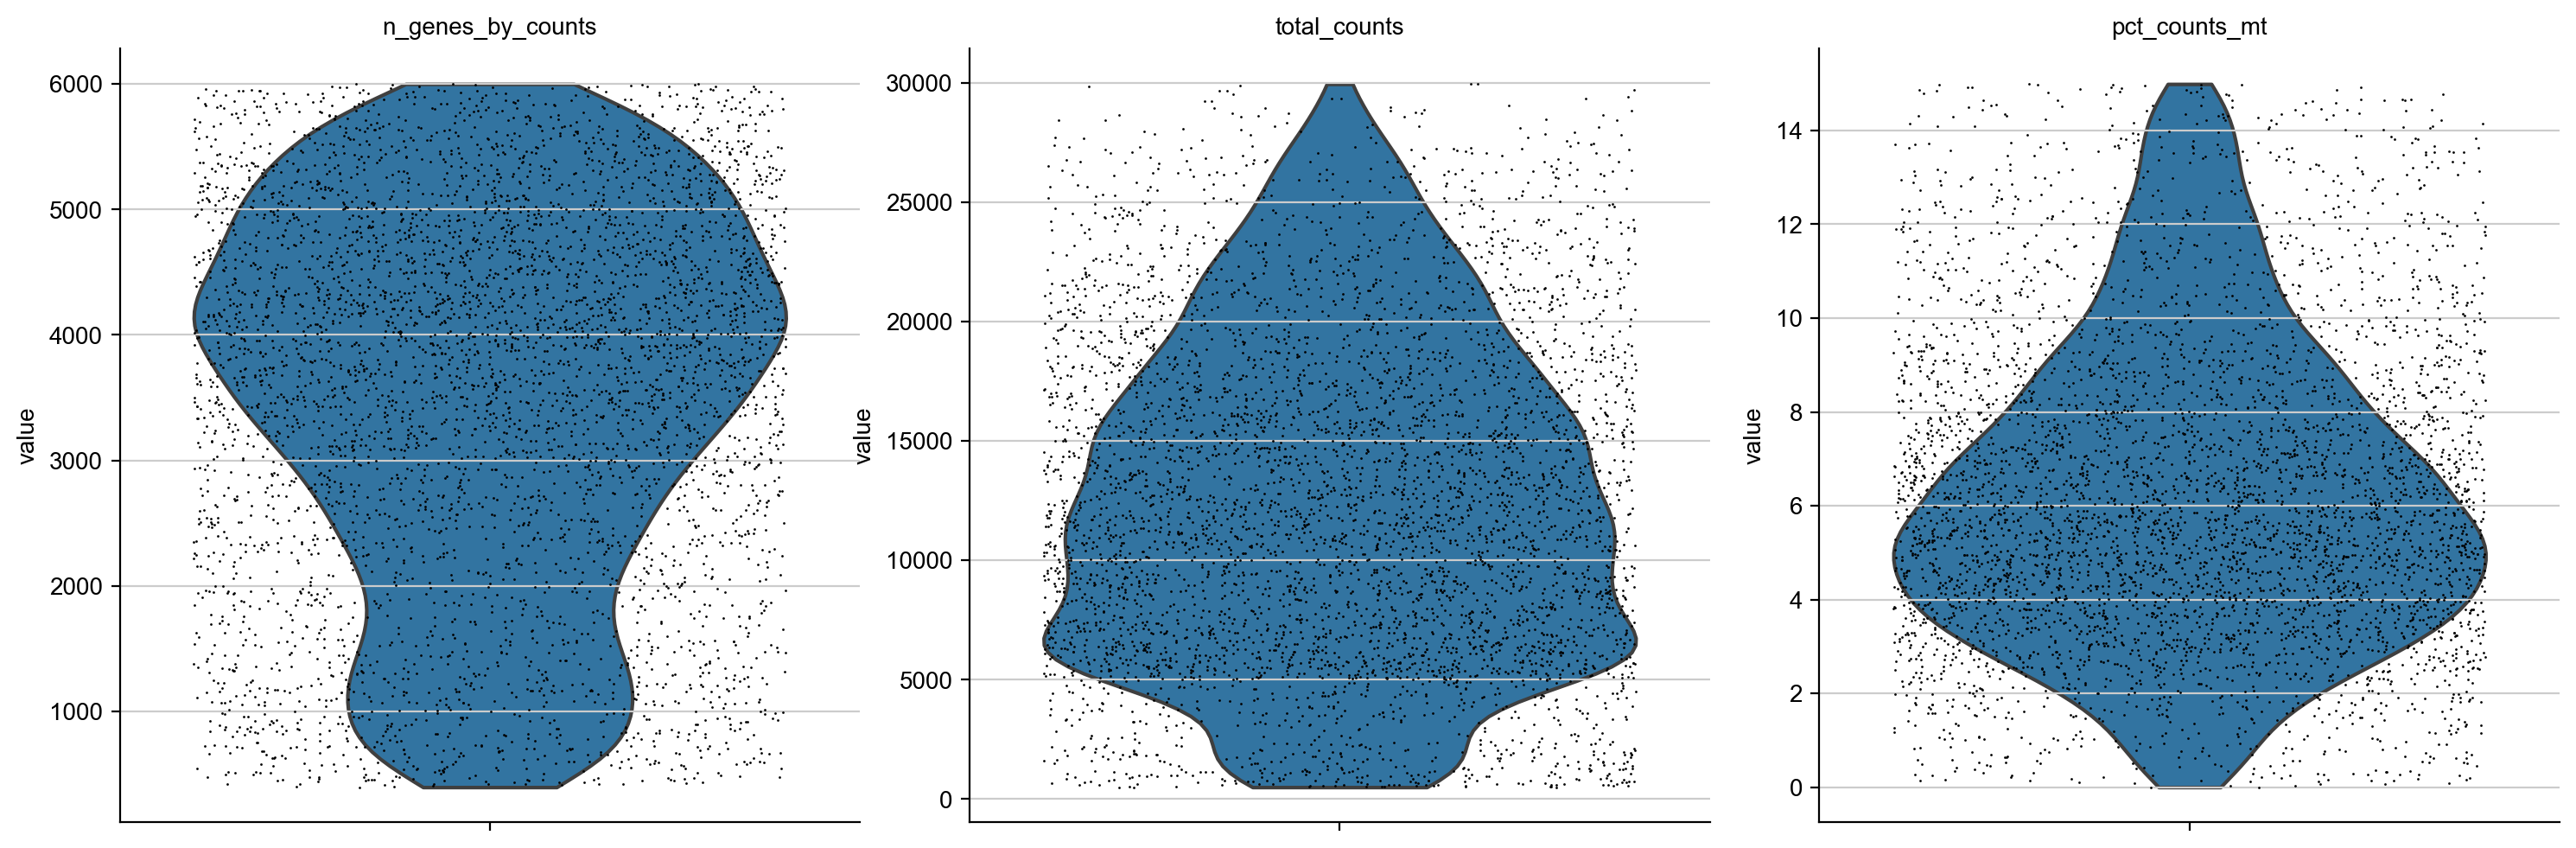

In [30]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], jitter=0.4, multi_panel=True)

save post QC scanpy

# Perform Demultiplex Hashing

In [31]:
hto.var_names

Index(['MRTX1_B0251', 'MRTX2_B0252', 'MRTX3_B0253'], dtype='object')

In [32]:
#perfrom Hashsolo anlaysis
hashNames = ['MRTX1_B0251', 'MRTX2_B0252', 'MRTX3_B0253']
sc.external.pp.hashsolo(adata, hashNames)#, priors=[0.01, 0.8, 0.19], number_of_noise_barcodes=None)
adata.obs.head()

Please cite HashSolo paper:
https://www.cell.com/cell-systems/fulltext/S2405-4712(20)30195-2


/Users/jonathanrub/miniforge3/envs/scDL/lib/python3.8/site-packages/scanpy/external/pp/_hashsolo.py:379: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["most_likely_hypothesis"] = results.loc[


,MRTX1_B0251,MRTX2_B0252,MRTX3_B0253,n_genes,n_genes_by_counts,total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_mm,pct_counts_mm,total_counts_mt,pct_counts_mt,most_likely_hypothesis,cluster_feature,negative_hypothesis_probability,singlet_hypothesis_probability,doublet_hypothesis_probability,Classification
AAACCCAGTACAGCGA-1,2930.0,31.0,19.0,4347,4320,12858.0,24.540876,33.188687,41.929485,54.567997,47.0,0.364200,1263.0,9.822679,1,0,5.349299e-17,0.999052,0.000948,MRTX1_B0251
AAACCCAGTTAGGACG-1,31.0,1316.0,18.0,1171,1163,9437.0,49.460203,65.982218,79.752329,91.850127,11.0,0.116427,1232.0,13.054996,1,0,1.206989e-05,0.996997,0.002991,MRTX2_B0252
AAACCCAGTTCCTTGC-1,1281.0,11.0,19.0,4785,4751,14625.0,20.476418,26.783155,34.919118,49.273087,26.0,0.177462,1502.0,10.270085,1,0,1.122869e-11,0.999385,0.000615,MRTX1_B0251
AAACGAACACTGAATC-1,79.0,86.0,43.0,830,826,1117.0,20.535714,29.821429,43.928571,70.714286,3.0,0.267857,38.0,3.401970,1,0,9.075563e-02,0.876582,0.032662,MRTX2_B0252
AAACGAACAGGATGAC-1,1499.0,13.0,18.0,5905,5883,22477.0,21.316210,27.897263,36.300213,49.568966,27.0,0.119979,2312.0,10.286071,1,0,2.465464e-12,0.999504,0.000496,MRTX1_B0251


visualize hashes

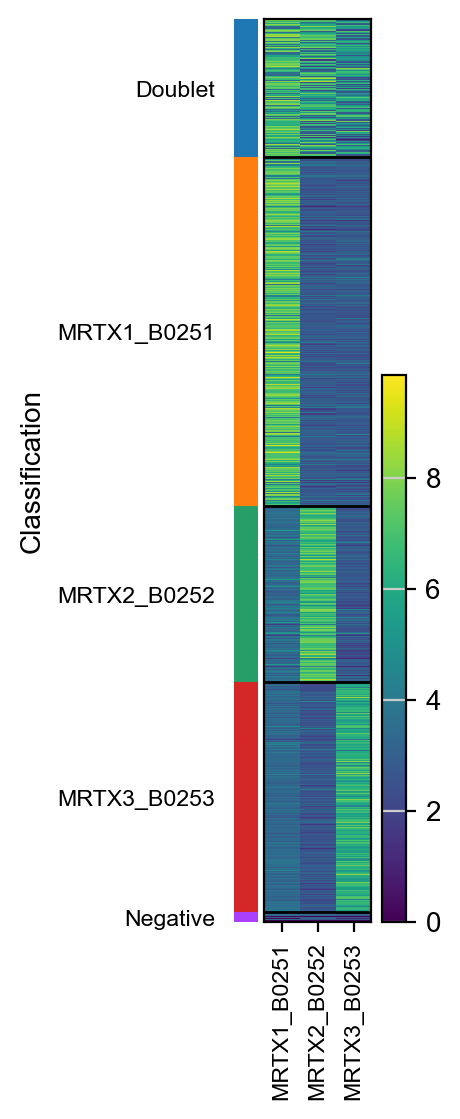

In [33]:
#output visulaization of hashing
sc.pl.heatmap(adata, hashNames, groupby="Classification", log=True, save = f"_{figName}_hash.png")

count each hash

In [34]:
from collections import Counter

Counter(adata.obs["Classification"])

Counter({'MRTX1_B0251': 1840,
         'MRTX2_B0252': 929,
         'Doublet': 728,
         'MRTX3_B0253': 1213,
         'Negative': 51})

In [35]:
hashCounts = adata.obs[hashNames]
hashCounts

,MRTX1_B0251,MRTX2_B0252,MRTX3_B0253
AAACCCAGTACAGCGA-1,2930.0,31.0,19.0
AAACCCAGTTAGGACG-1,31.0,1316.0,18.0
AAACCCAGTTCCTTGC-1,1281.0,11.0,19.0
AAACGAACACTGAATC-1,79.0,86.0,43.0
AAACGAACAGGATGAC-1,1499.0,13.0,18.0
...,...,...,...
TTTGTTGCATAGGAGC-1,549.0,12.0,14.0
TTTGTTGGTAACATAG-1,655.0,16.0,13.0
TTTGTTGGTGGAGAAA-1,291.0,472.0,172.0
TTTGTTGGTGTGAATA-1,1668.0,10.0,44.0


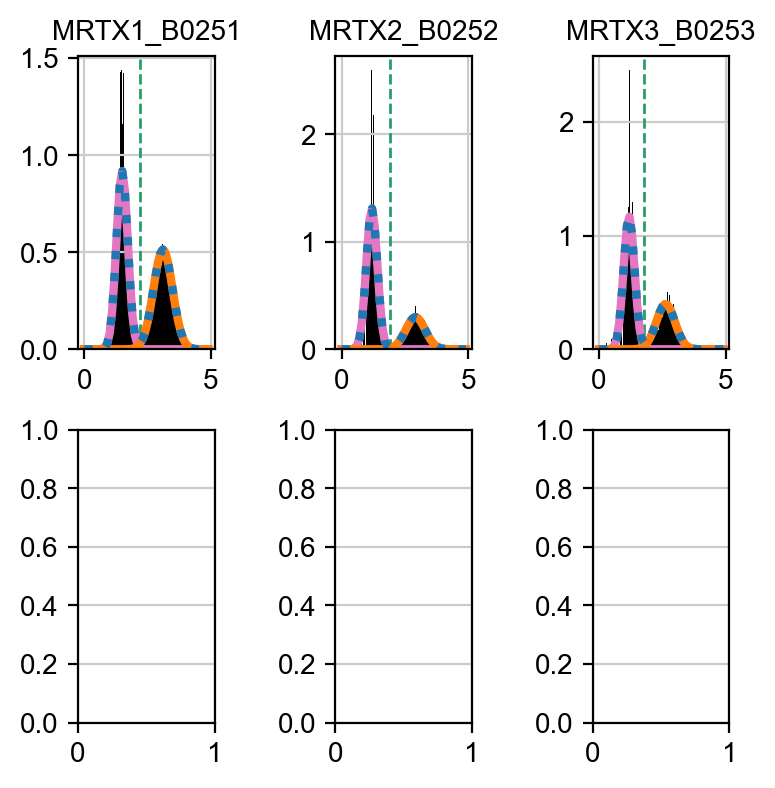

In [36]:
numHashes = len(hashNames)
plotLen = 3
fig, axs = plt.subplots(2,plotLen)
plt.rcParams["figure.figsize"] = (15,5)

dfHashBoundry = pd.DataFrame(np.zeros(numHashes),hashNames, columns=["boundry"])
gmm = GMM(n_components = 2, random_state=10, covariance_type = 'full', n_init=5, means_init=[[1],[4]])
#binEx = np.arange(0.5,10,10/200).reshape(-1,1)

for i, hashName in enumerate(hashNames):
    hashCount = np.array(np.log10(adata.obs[hashName]+1)).reshape(-1, 1)
    fitGMM = gmm.fit(hashCount)
    mean = fitGMM.means_  
    covs  = fitGMM.covariances_
    weights = fitGMM.weights_
    #print(mean)
    binEx = np.arange(min(mean),max(mean),0.1).reshape(-1,1)
    fitGmmBound = fitGMM.predict(binEx)
    #print(fitGmmBound)
    hashBoundry = binEx[np.where(fitGmmBound == 1)[0][0]][0]
    #naiveBoundry = np.log10(int(hashDisc.loc["90%",hashName])+1)
    
    dfHashBoundry.loc[hashName] = hashBoundry
    
    x_axis = np.arange(0, 5, 0.1)
    y_axis0 = norm.pdf(x_axis, float(mean[0][0]), np.sqrt(float(covs[0][0][0])))*weights[0] # 1st gaussian
    y_axis1 = norm.pdf(x_axis, float(mean[1][0]), np.sqrt(float(covs[1][0][0])))*weights[1] # 2nd gaussian

    # Plot 2
    x,y = i//plotLen, i%plotLen
    axs[x,y].set_title(hashName)
    #axs[x,y].axvline(naiveBoundry, c='C3', linestyle='dashed', linewidth=1) #red
    axs[x,y].axvline(hashBoundry, c='C2', linestyle='dashed', linewidth=1)  #green
    axs[x,y].hist(hashCount, density=True, color='black', bins=100)        
    axs[x,y].plot(x_axis, y_axis0, lw=3, c='C6')                            #pink
    axs[x,y].plot(x_axis, y_axis1, lw=3, c='C1')                            #orange
    axs[x,y].plot(x_axis, y_axis0+y_axis1, lw=3, c='C0', ls=':')            #dotted blue
    
plt.tight_layout(pad=1.0)
plt.show()

In [37]:
hashIDs = hashCounts.copy()
hashID = np.array(hashNames)
for hashName in hashNames:
    print(hashName)
    print(dfHashBoundry.loc[hashName].values[0])
    hashIDs.loc[:,hashName] = np.log10(hashCounts.loc[:,hashName]+1) > dfHashBoundry.loc[hashName].values[0]
hashIDs

MRTX1_B0251
2.1930548188786414
MRTX2_B0252
1.8885977101444527
MRTX3_B0253
1.78281184015605


,MRTX1_B0251,MRTX2_B0252,MRTX3_B0253
AAACCCAGTACAGCGA-1,True,False,False
AAACCCAGTTAGGACG-1,False,True,False
AAACCCAGTTCCTTGC-1,True,False,False
AAACGAACACTGAATC-1,False,True,False
AAACGAACAGGATGAC-1,True,False,False
...,...,...,...
TTTGTTGCATAGGAGC-1,True,False,False
TTTGTTGGTAACATAG-1,True,False,False
TTTGTTGGTGGAGAAA-1,True,True,True
TTTGTTGGTGTGAATA-1,True,False,False


In [38]:
classification = np.empty(len(adata), dtype="object")
i = 0
for cellBar, hashBool in hashIDs.iterrows():
    numHashes = sum(hashBool)
    if (numHashes == 1):
        classif = hashID[hashBool.values][0]#.values
    elif (numHashes > 1):
        classif = "Doublet"
    else:
        classif = "Negative"
    classification[i] = classif
    i = i + 1

In [39]:
adata.obs["GMM"] = classification
adata.obs["GMM"].value_counts()

MRTX1_B0251    1642
MRTX3_B0253    1186
MRTX2_B0252     879
Doublet         797
Negative        257
Name: GMM, dtype: int64

In [40]:
adata.obs[hashNames]

,MRTX1_B0251,MRTX2_B0252,MRTX3_B0253
AAACCCAGTACAGCGA-1,2930.0,31.0,19.0
AAACCCAGTTAGGACG-1,31.0,1316.0,18.0
AAACCCAGTTCCTTGC-1,1281.0,11.0,19.0
AAACGAACACTGAATC-1,79.0,86.0,43.0
AAACGAACAGGATGAC-1,1499.0,13.0,18.0
...,...,...,...
TTTGTTGCATAGGAGC-1,549.0,12.0,14.0
TTTGTTGGTAACATAG-1,655.0,16.0,13.0
TTTGTTGGTGGAGAAA-1,291.0,472.0,172.0
TTTGTTGGTGTGAATA-1,1668.0,10.0,44.0


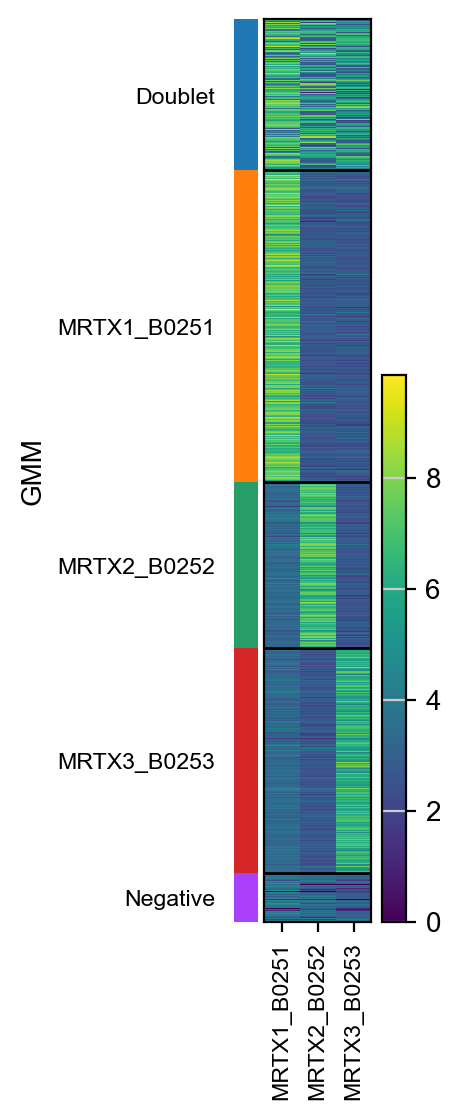

In [41]:
sc.pl.heatmap(adata, hashNames, groupby="GMM", log=True)#, save = f"_{figName}_hash.png")

In [42]:
adata1 = adata

# PDX Vehcile

In [43]:
adata = sc.read_10x_h5(f"{inDir}PC69_VEH_Lane2.h5", gex_only=False)
adata

reading data/PC69_VEH_Lane2.h5
 (0:00:00)


/Users/jonathanrub/miniforge3/envs/scDL/lib/python3.8/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


AnnData object with n_obs × n_vars = 5709 × 68889
    var: 'gene_ids', 'feature_types', 'genome'

In [44]:
adata.var

,gene_ids,feature_types,genome
GRCh38_MIR1302-2HG,GRCh38_ENSG00000243485,Gene Expression,GRCh38
GRCh38_FAM138A,GRCh38_ENSG00000237613,Gene Expression,GRCh38
GRCh38_OR4F5,GRCh38_ENSG00000186092,Gene Expression,GRCh38
GRCh38_AL627309.1,GRCh38_ENSG00000238009,Gene Expression,GRCh38
GRCh38_AL627309.3,GRCh38_ENSG00000239945,Gene Expression,GRCh38
...,...,...,...
mm10___AC234645.1,mm10___ENSMUSG00000095019,Gene Expression,mm10
mm10___AC149090.1,mm10___ENSMUSG00000095041,Gene Expression,mm10
Vehicle1_B0254,Vehicle1,Antibody Capture,
Vehicle2_B0255,Vehicle2,Antibody Capture,


In [45]:
adata.var[-4:]

,gene_ids,feature_types,genome
mm10___AC149090.1,mm10___ENSMUSG00000095041,Gene Expression,mm10
Vehicle1_B0254,Vehicle1,Antibody Capture,
Vehicle2_B0255,Vehicle2,Antibody Capture,
Vehicle3_B0256,Vehicle3,Antibody Capture,


In [46]:
numGenes = 3

hto = adata[:,-numGenes:]
adata = adata[:,:-numGenes]
adata.obs = pd.DataFrame(hto.X.todense(), columns=hto.var_names, index=adata.obs.index)

/Users/jonathanrub/miniforge3/envs/scDL/lib/python3.8/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [47]:
adata.obs

,Vehicle1_B0254,Vehicle2_B0255,Vehicle3_B0256
AAACCCAAGTAGGTTA-1,35.0,1316.0,35.0
AAACCCACACACTTAG-1,45.0,1474.0,34.0
AAACCCAGTCCAAATC-1,42.0,70.0,2828.0
AAACCCATCCATCAGA-1,1485.0,1093.0,30.0
AAACCCATCTCATAGG-1,23.0,17.0,1352.0
...,...,...,...
TTTGTTGAGCGAAACC-1,1018.0,55.0,38.0
TTTGTTGAGTCGCGAA-1,929.0,39.0,36.0
TTTGTTGAGTGGTGAC-1,34.0,50.0,288.0
TTTGTTGGTCTAGTGT-1,92.0,43.0,478.0


In [48]:
adata.var_names_make_unique()
adata.obs_names_make_unique()

In [49]:
adata.obs 

,Vehicle1_B0254,Vehicle2_B0255,Vehicle3_B0256
AAACCCAAGTAGGTTA-1,35.0,1316.0,35.0
AAACCCACACACTTAG-1,45.0,1474.0,34.0
AAACCCAGTCCAAATC-1,42.0,70.0,2828.0
AAACCCATCCATCAGA-1,1485.0,1093.0,30.0
AAACCCATCTCATAGG-1,23.0,17.0,1352.0
...,...,...,...
TTTGTTGAGCGAAACC-1,1018.0,55.0,38.0
TTTGTTGAGTCGCGAA-1,929.0,39.0,36.0
TTTGTTGAGTGGTGAC-1,34.0,50.0,288.0
TTTGTTGGTCTAGTGT-1,92.0,43.0,478.0


In [50]:
adata.var

,gene_ids,feature_types,genome
GRCh38_MIR1302-2HG,GRCh38_ENSG00000243485,Gene Expression,GRCh38
GRCh38_FAM138A,GRCh38_ENSG00000237613,Gene Expression,GRCh38
GRCh38_OR4F5,GRCh38_ENSG00000186092,Gene Expression,GRCh38
GRCh38_AL627309.1,GRCh38_ENSG00000238009,Gene Expression,GRCh38
GRCh38_AL627309.3,GRCh38_ENSG00000239945,Gene Expression,GRCh38
...,...,...,...
mm10___AC124606.1,mm10___ENSMUSG00000095523,Gene Expression,mm10
mm10___AC133095.2,mm10___ENSMUSG00000095475,Gene Expression,mm10
mm10___AC133095.1,mm10___ENSMUSG00000094855,Gene Expression,mm10
mm10___AC234645.1,mm10___ENSMUSG00000095019,Gene Expression,mm10


# Start QC
investigate highest expressed genes

normalizing counts per cell
    finished (0:00:00)


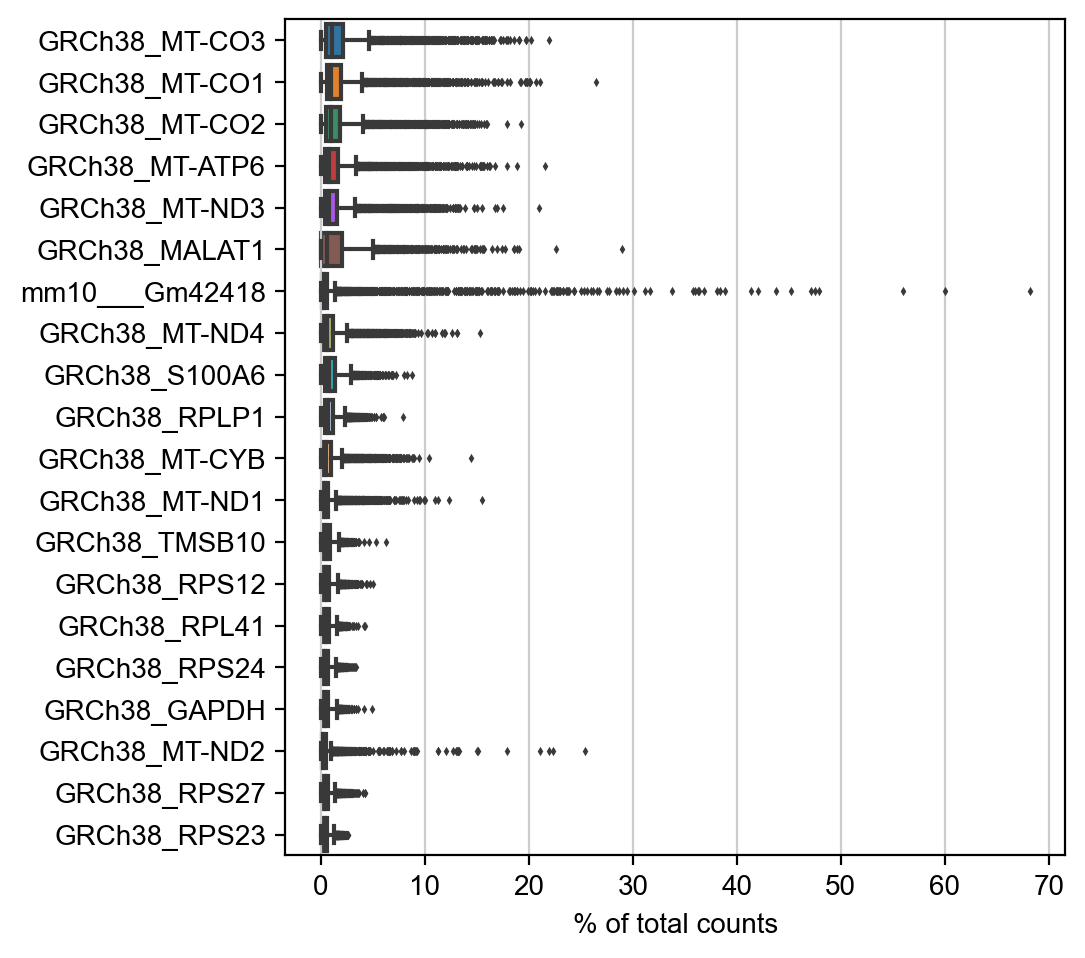

In [51]:
sc.pl.highest_expr_genes(adata, n_top=20, )

/var/folders/nc/t9t85q_94q7g4tf0gz83qts40000gn/T/ipykernel_66941/1029756660.py:22: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


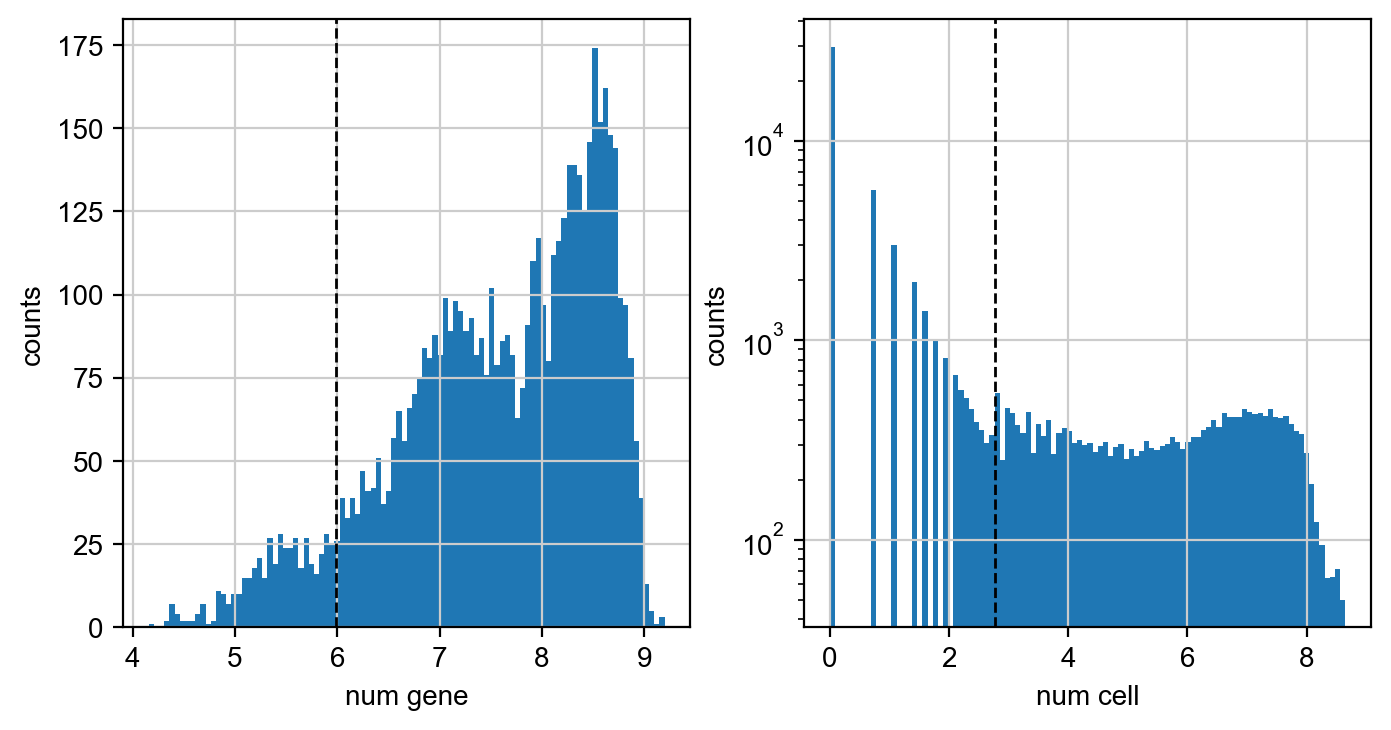

In [52]:
valX = adata.X>0
minGenes=400
minCells=15

fig, axs = plt.subplots(1, 2, figsize=(8, 4))

numCellwExp = valX.sum(axis=1)
axs[0].hist(np.log(numCellwExp), bins=100)#, log=True)
axs[0].axvline(np.log(minGenes), color='k', linestyle='dashed', linewidth=1)
axs[0].set_xlabel('num gene')
axs[0].set_ylabel('counts')

numGeneswExp = valX.sum(axis=0).T
axs[1].hist(np.log(numGeneswExp+1), bins=100, log=True)
axs[1].axvline(np.log(minCells+1), color='k', linestyle='dashed', linewidth=1)
#axs[0,1].axvline(np.log(600), color='k', linestyle='dashed', linewidth=1)
#axs[0,1].axvline(np.log(4000), color='k', linestyle='dashed', linewidth=1)
#axs[0,1].set_title('Gene means counts')
axs[1].set_xlabel('num cell')
axs[1].set_ylabel('counts')

fig.show()

In [53]:
sc.pp.filter_cells(adata, min_genes = minGenes)
sc.pp.filter_genes(adata, min_cells = minCells)

filtered out 477 cells that have less than 400 genes expressed
filtered out 46980 genes that are detected in less than 15 cells


In [54]:
adata = adata[:,np.logical_not(adata.var_names=="GRCh38_MALAT1")]

In [55]:
adata

View of AnnData object with n_obs × n_vars = 5232 × 21905
    obs: 'Vehicle1_B0254', 'Vehicle2_B0255', 'Vehicle3_B0256', 'n_genes'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells'

## Mouse QC

In [56]:
adata.var

,gene_ids,feature_types,genome,n_cells
GRCh38_AL627309.1,GRCh38_ENSG00000238009,Gene Expression,GRCh38,19
GRCh38_AL627309.5,GRCh38_ENSG00000241860,Gene Expression,GRCh38,74
GRCh38_LINC01409,GRCh38_ENSG00000237491,Gene Expression,GRCh38,317
GRCh38_LINC01128,GRCh38_ENSG00000228794,Gene Expression,GRCh38,270
GRCh38_LINC00115,GRCh38_ENSG00000225880,Gene Expression,GRCh38,88
...,...,...,...,...
mm10___mt-Co2,mm10___ENSMUSG00000064354,Gene Expression,mm10,33
mm10___mt-Atp6,mm10___ENSMUSG00000064357,Gene Expression,mm10,44
mm10___mt-Co3,mm10___ENSMUSG00000064358,Gene Expression,mm10,44
mm10___mt-Nd4,mm10___ENSMUSG00000064363,Gene Expression,mm10,15


In [57]:
adata.var['mm'] = adata.var_names.str.startswith('mm10___') 
sc.pp.calculate_qc_metrics(adata, qc_vars=['mm'], log1p = False, inplace=True)

/var/folders/nc/t9t85q_94q7g4tf0gz83qts40000gn/T/ipykernel_66941/1039509494.py:1: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['mm'] = adata.var_names.str.startswith('mm10___')


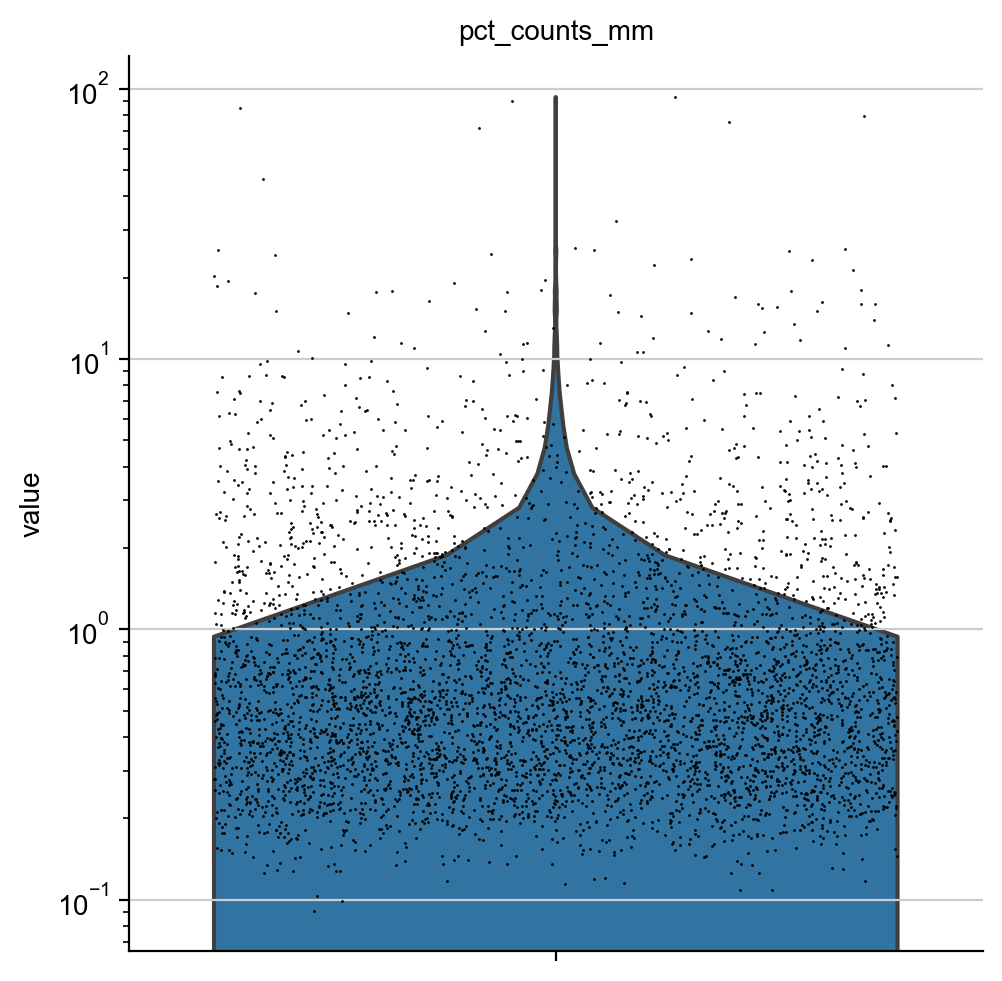

In [58]:
sc.pl.violin(adata, ['pct_counts_mm'], jitter=0.4, multi_panel=True, log=True)

In [59]:
sum(adata.obs.pct_counts_mm < 1)/len(adata.obs)

0.7431192660550459

In [60]:
adata = adata[adata.obs.pct_counts_mm < 1, :]
adata = adata[:,adata.var_names.str.startswith('GRCh38_')]
adata

View of AnnData object with n_obs × n_vars = 3888 × 20592
    obs: 'Vehicle1_B0254', 'Vehicle2_B0255', 'Vehicle3_B0256', 'n_genes', 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mm', 'pct_counts_mm'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mm', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [61]:
adata.var_names = [g.split("38_")[1] for g in adata.var_names]
adata.var

,gene_ids,feature_types,genome,n_cells,mm,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts
AL627309.1,GRCh38_ENSG00000238009,Gene Expression,GRCh38,19,False,19,0.003631,99.636850,19.0
AL627309.5,GRCh38_ENSG00000241860,Gene Expression,GRCh38,74,False,74,0.014526,98.585627,76.0
LINC01409,GRCh38_ENSG00000237491,Gene Expression,GRCh38,317,False,317,0.070528,93.941131,369.0
LINC01128,GRCh38_ENSG00000228794,Gene Expression,GRCh38,270,False,270,0.060206,94.839450,315.0
LINC00115,GRCh38_ENSG00000225880,Gene Expression,GRCh38,88,False,88,0.017011,98.318043,89.0
...,...,...,...,...,...,...,...,...,...
AC011841.1,GRCh38_ENSG00000273496,Gene Expression,GRCh38,111,False,111,0.021789,97.878440,114.0
AL354822.1,GRCh38_ENSG00000278384,Gene Expression,GRCh38,201,False,201,0.041476,96.158257,217.0
AL592183.1,GRCh38_ENSG00000273748,Gene Expression,GRCh38,833,False,833,0.211583,84.078746,1107.0
AC240274.1,GRCh38_ENSG00000271254,Gene Expression,GRCh38,34,False,34,0.006881,99.350153,36.0


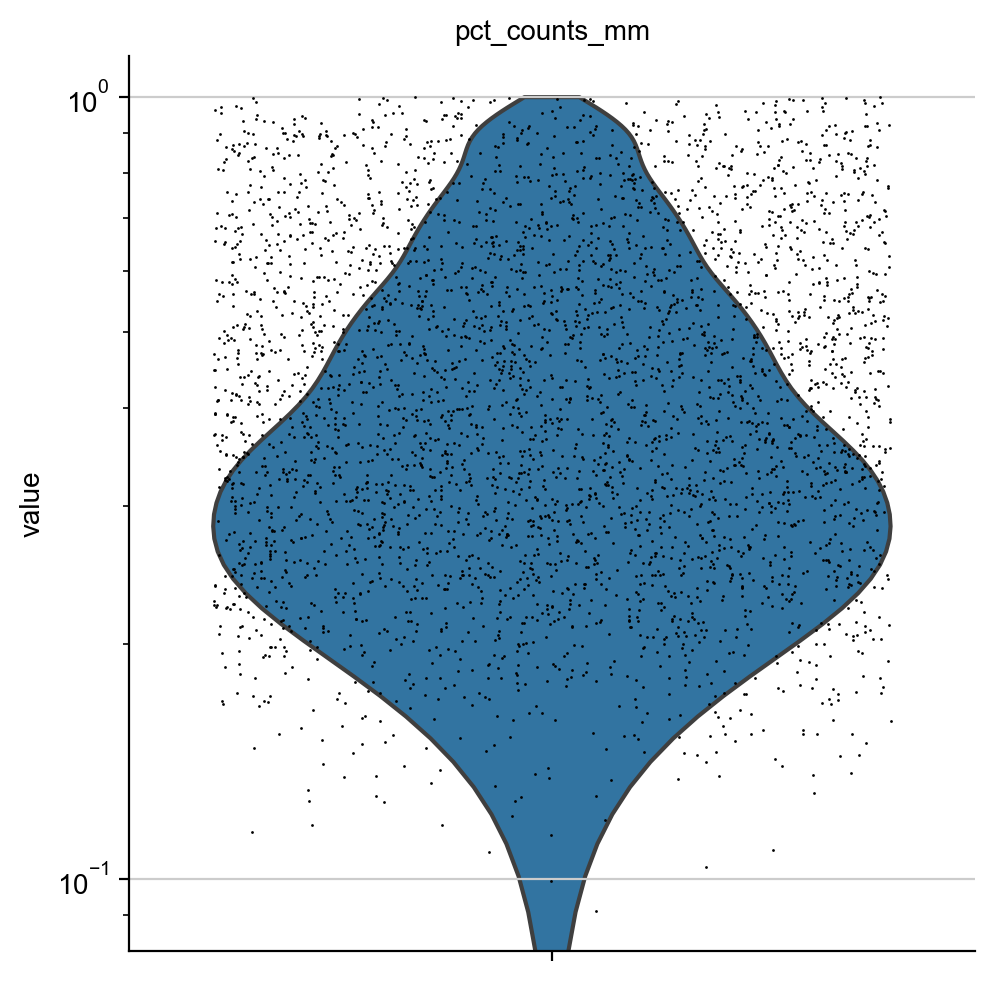

In [62]:
sc.pl.violin(adata, ['pct_counts_mm'],jitter=0.4, multi_panel=True, log = True)

In [63]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of human mitochondrial genes as 'hMT'
#adata.var['mmt'] = adata.var_names.str.startswith('mm10___mt-')  # annotate the group of mouse mitochondrial genes as 'mmt'

sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
#sc.pp.calculate_qc_metrics(adata, qc_vars=['mmt'], percent_top=None, log1p=False, inplace=True)

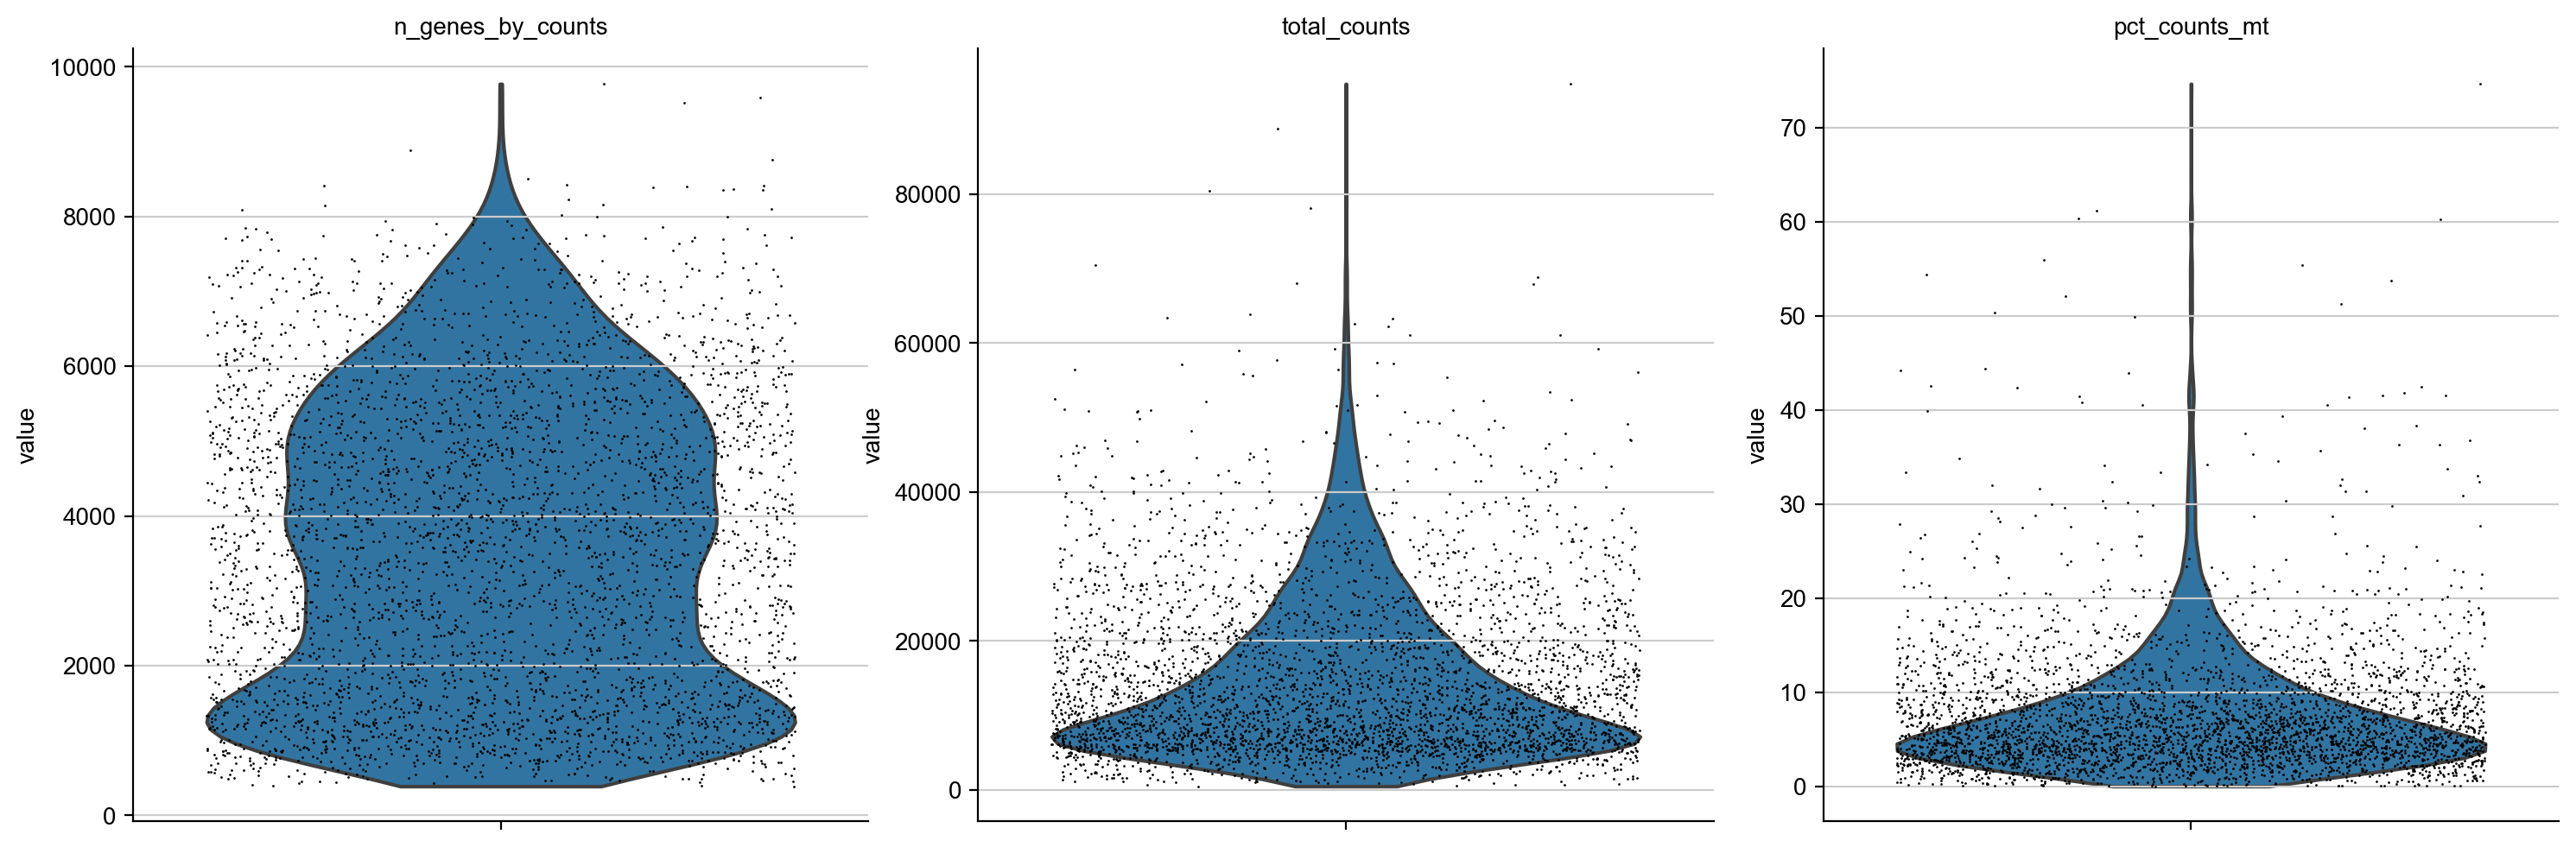

In [64]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], jitter=0.4, multi_panel=True)

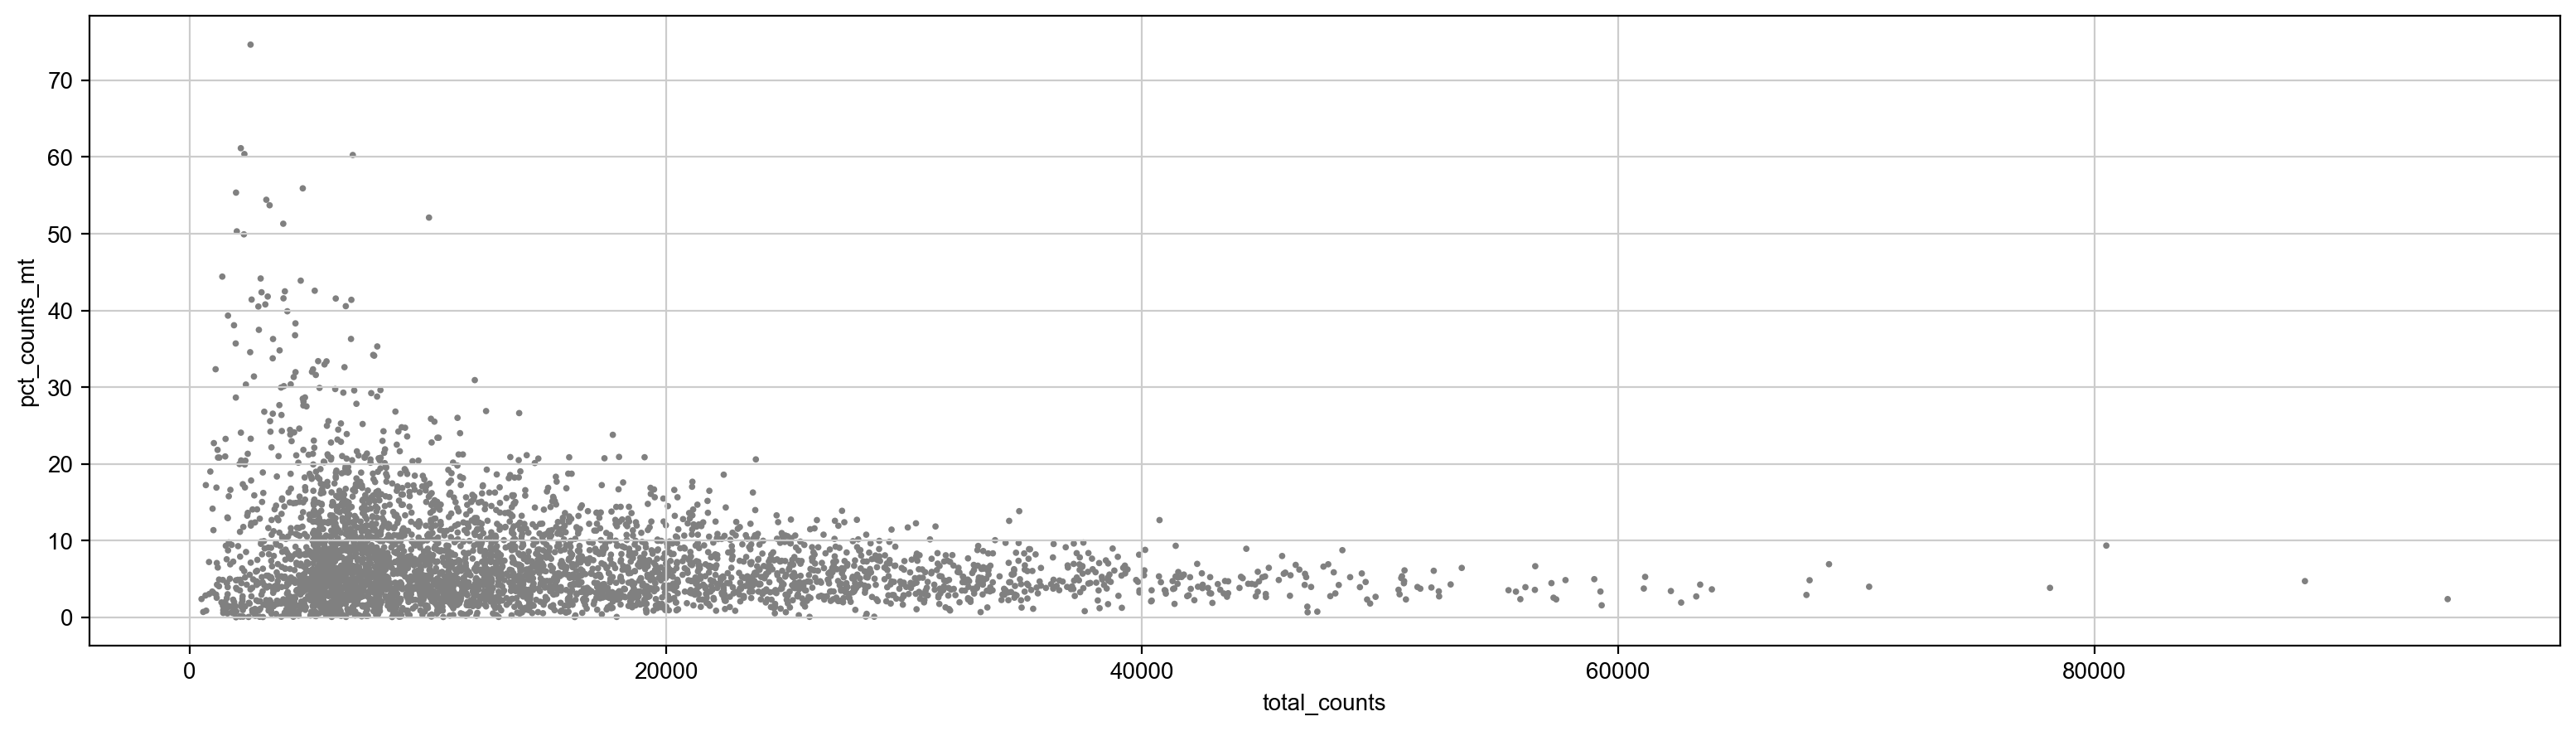

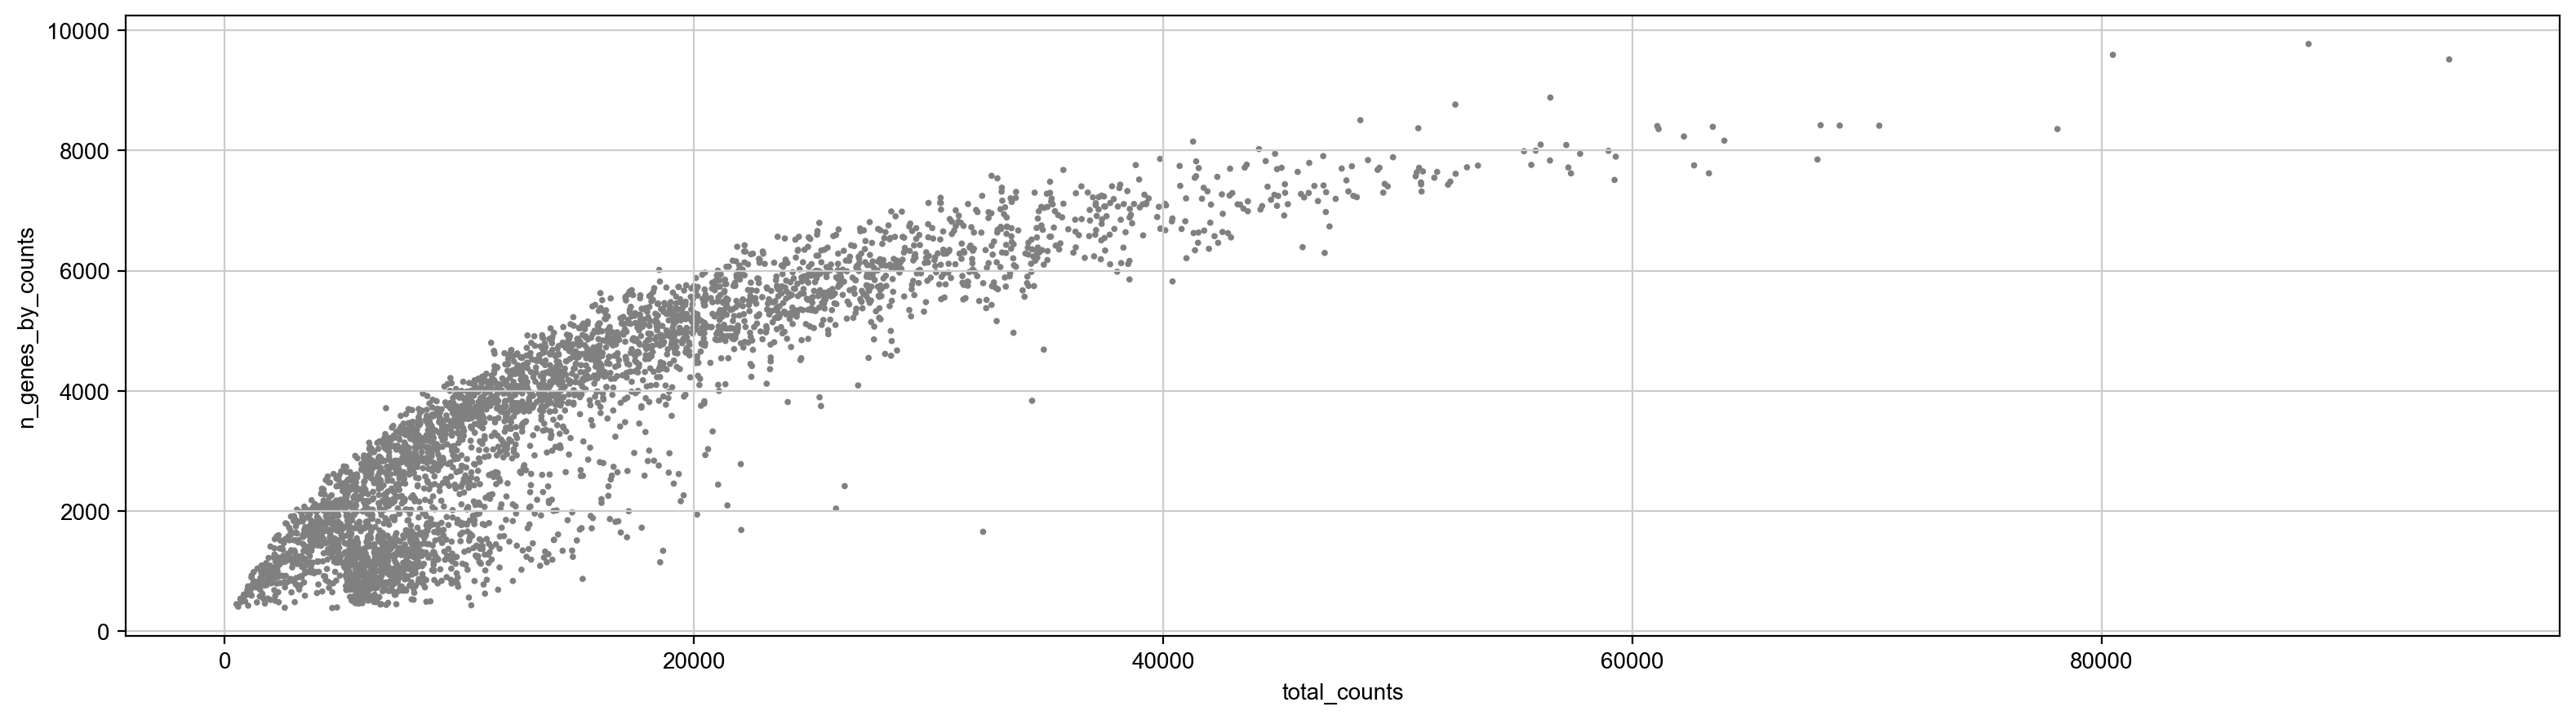

In [65]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

remove cells that have too much mito or could be doublets

In [66]:
adata = adata[adata.obs.n_genes_by_counts < 7000, :]
adata = adata[adata.obs.total_counts < 35000, :]
adata = adata[adata.obs.pct_counts_mt < 20, :]

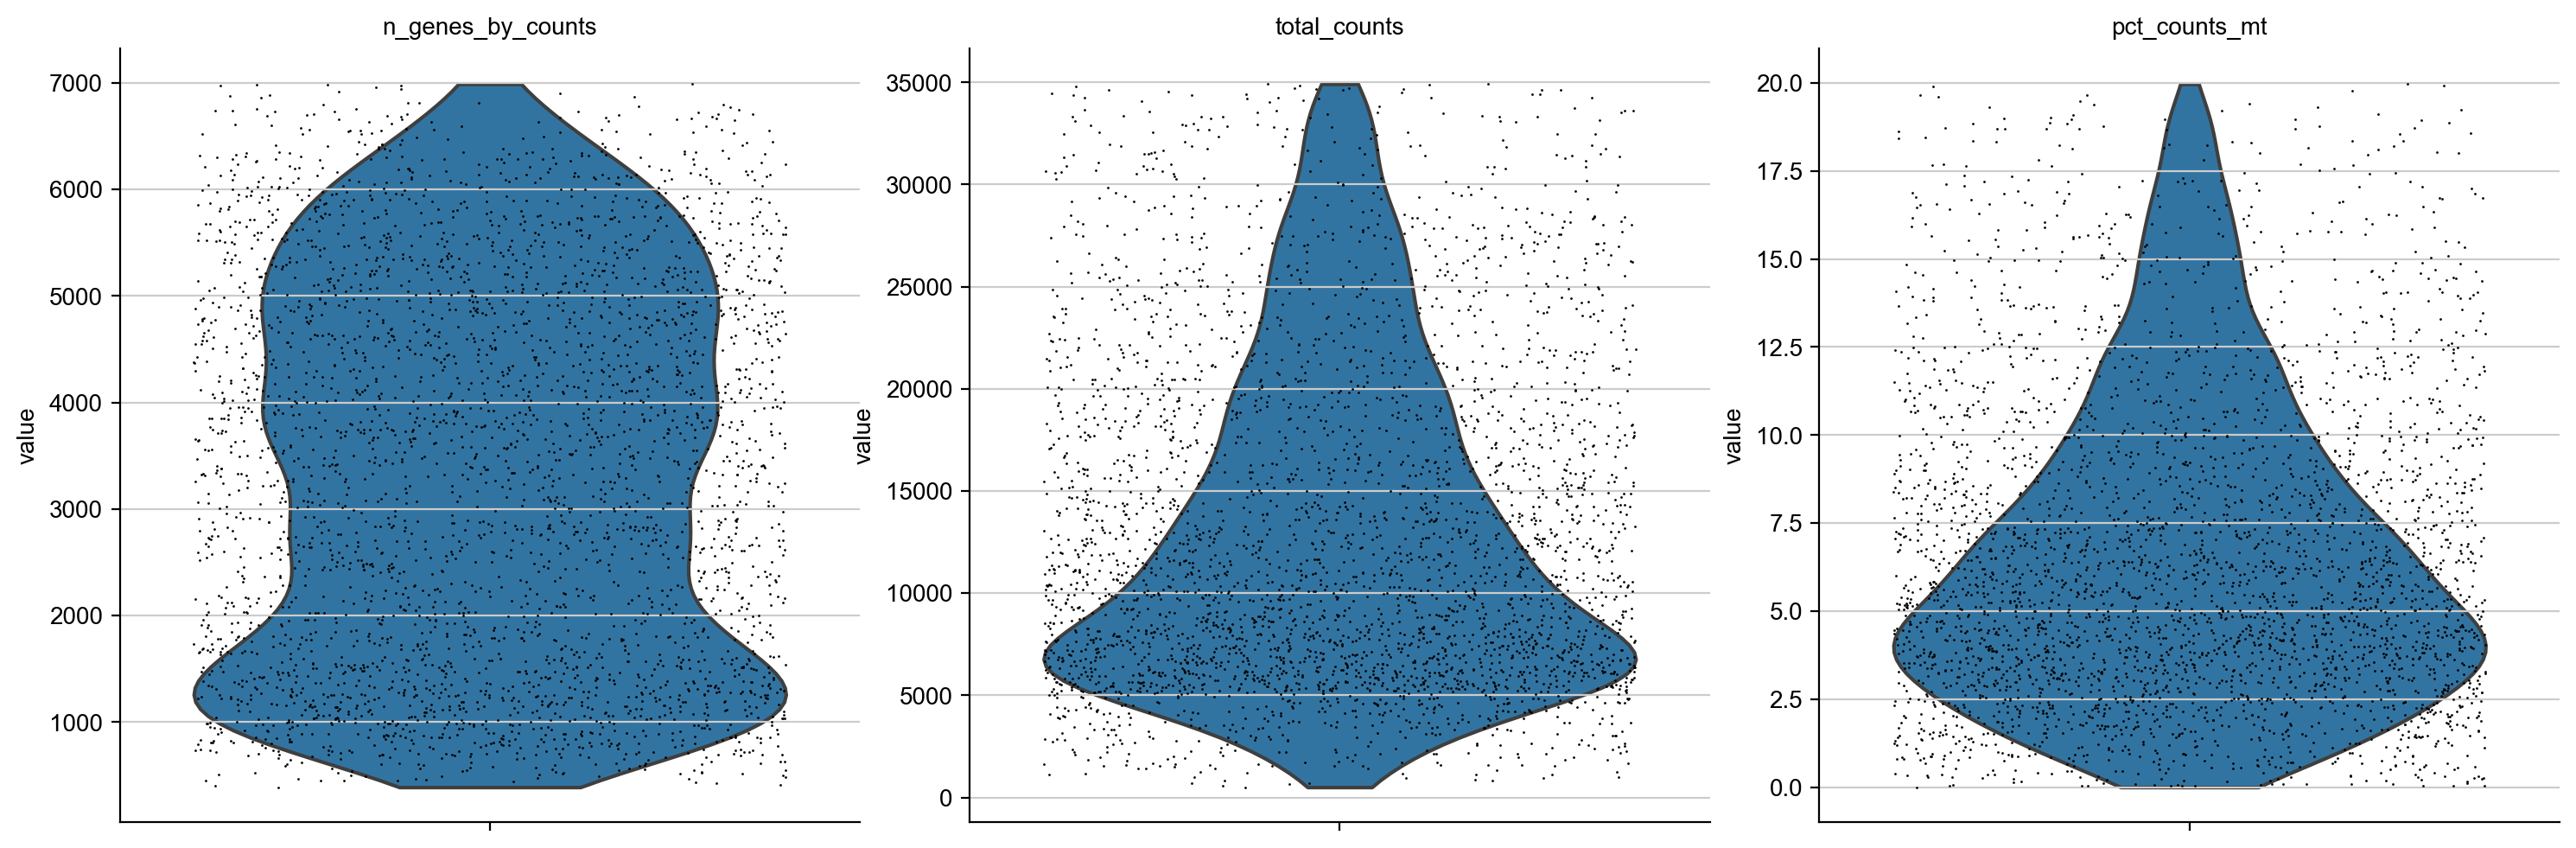

In [67]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], jitter=0.4, multi_panel=True)

# Perform Demultiplex Hashing

In [68]:
hto.var_names

Index(['Vehicle1_B0254', 'Vehicle2_B0255', 'Vehicle3_B0256'], dtype='object')

In [69]:
#perfrom Hashsolo anlaysis
hashNames = ['Vehicle1_B0254', 'Vehicle2_B0255', 'Vehicle3_B0256']
sc.external.pp.hashsolo(adata, hashNames)#, priors=[0.01, 0.8, 0.19], number_of_noise_barcodes=None)
adata.obs.head()

Please cite HashSolo paper:
https://www.cell.com/cell-systems/fulltext/S2405-4712(20)30195-2


/Users/jonathanrub/miniforge3/envs/scDL/lib/python3.8/site-packages/scanpy/external/pp/_hashsolo.py:379: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["most_likely_hypothesis"] = results.loc[


,Vehicle1_B0254,Vehicle2_B0255,Vehicle3_B0256,n_genes,n_genes_by_counts,total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_mm,pct_counts_mm,total_counts_mt,pct_counts_mt,most_likely_hypothesis,cluster_feature,negative_hypothesis_probability,singlet_hypothesis_probability,doublet_hypothesis_probability,Classification
AAACCCAAGTAGGTTA-1,35.0,1316.0,35.0,2667,2640,18929.0,36.433577,51.409601,66.069452,80.534331,48.0,0.252938,314.0,1.658830,1,0,4.977414e-17,0.999573,0.000427,Vehicle2_B0255
AAACCCATCCATCAGA-1,1485.0,1093.0,30.0,6819,6774,29987.0,15.148488,21.387668,29.681049,44.186976,49.0,0.163138,822.0,2.741188,2,0,9.753146e-13,0.000055,0.999945,Doublet
AAACCCATCTCATAGG-1,23.0,17.0,1352.0,2085,2077,4393.0,19.373027,28.574650,40.257104,58.976094,41.0,0.924673,56.0,1.274755,1,0,3.825928e-11,0.999973,0.000027,Vehicle3_B0256
AAACGAAAGCGTGAGT-1,48.0,2116.0,48.0,7100,6986,28416.0,20.284011,26.360449,34.007714,46.472651,104.0,0.364656,3059.0,10.765062,1,0,2.992161e-17,0.998281,0.001719,Vehicle2_B0255
AAACGAAAGCTACTGT-1,4630.0,64.0,33.0,3549,3483,9681.0,25.680934,34.159328,43.436412,57.474913,85.0,0.870367,879.0,9.079640,1,0,2.358771e-12,0.999490,0.000510,Vehicle1_B0254


visualize hashes

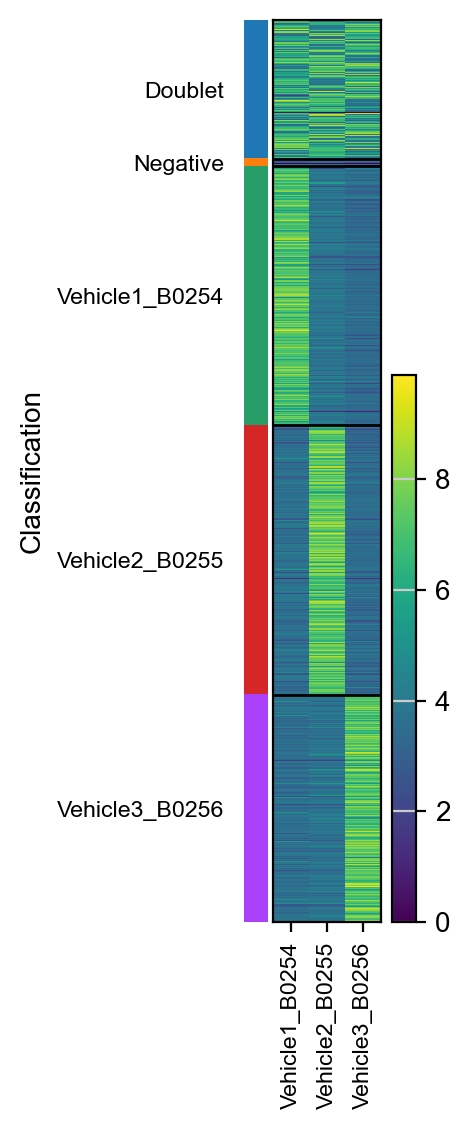

In [70]:
#output visulaization of hashing
sc.pl.heatmap(adata, hashNames, groupby="Classification", log=True, save = f"_{figName}_hash.png")

count each hash

In [71]:
from collections import Counter

Counter(adata.obs["Classification"])

Counter({'Vehicle2_B0255': 1036,
         'Doublet': 536,
         'Vehicle3_B0256': 875,
         'Vehicle1_B0254': 996,
         'Negative': 27})

In [72]:
hashCounts = adata.obs[hashNames]
hashCounts

,Vehicle1_B0254,Vehicle2_B0255,Vehicle3_B0256
AAACCCAAGTAGGTTA-1,35.0,1316.0,35.0
AAACCCATCCATCAGA-1,1485.0,1093.0,30.0
AAACCCATCTCATAGG-1,23.0,17.0,1352.0
AAACGAAAGCGTGAGT-1,48.0,2116.0,48.0
AAACGAAAGCTACTGT-1,4630.0,64.0,33.0
...,...,...,...
TTTGGTTCATCCTAAG-1,20.0,3659.0,9.0
TTTGGTTGTGTACATC-1,27.0,38.0,319.0
TTTGGTTTCGTAGAGG-1,26.0,3877.0,21.0
TTTGTTGAGTCGCGAA-1,929.0,39.0,36.0


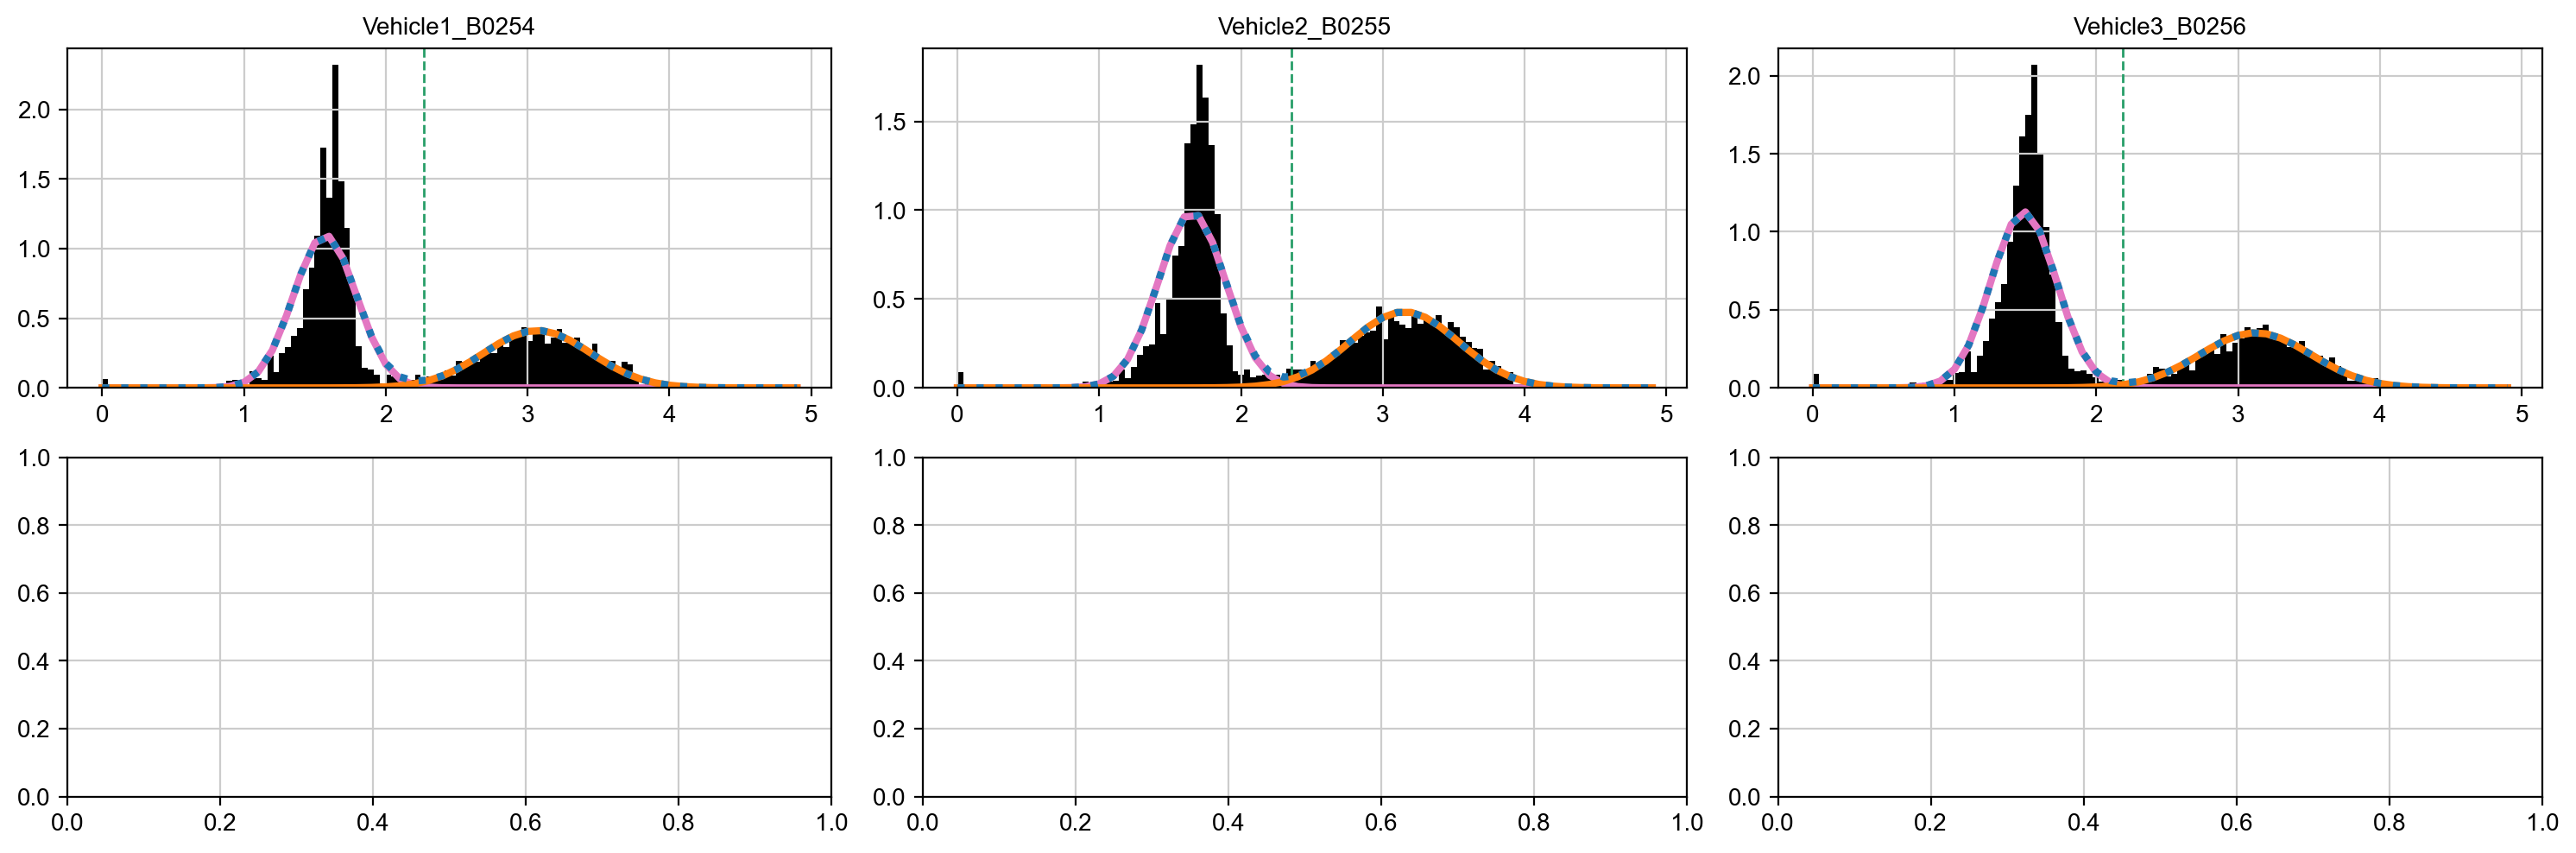

In [73]:
numHashes = len(hashNames)
plotLen = 3
fig, axs = plt.subplots(2,plotLen)
plt.rcParams["figure.figsize"] = (15,5)

dfHashBoundry = pd.DataFrame(np.zeros(numHashes),hashNames, columns=["boundry"])
gmm = GMM(n_components = 2, random_state=10, covariance_type = 'full', n_init=5, means_init=[[1],[4]])
#binEx = np.arange(0.5,10,10/200).reshape(-1,1)

for i, hashName in enumerate(hashNames):
    hashCount = np.array(np.log10(adata.obs[hashName]+1)).reshape(-1, 1)
    fitGMM = gmm.fit(hashCount)
    mean = fitGMM.means_  
    covs  = fitGMM.covariances_
    weights = fitGMM.weights_
    #print(mean)
    binEx = np.arange(min(mean),max(mean),0.1).reshape(-1,1)
    fitGmmBound = fitGMM.predict(binEx)
    #print(fitGmmBound)
    hashBoundry = binEx[np.where(fitGmmBound == 1)[0][0]][0]
    #naiveBoundry = np.log10(int(hashDisc.loc["90%",hashName])+1)
    
    dfHashBoundry.loc[hashName] = hashBoundry
    
    x_axis = np.arange(0, 5, 0.1)
    y_axis0 = norm.pdf(x_axis, float(mean[0][0]), np.sqrt(float(covs[0][0][0])))*weights[0] # 1st gaussian
    y_axis1 = norm.pdf(x_axis, float(mean[1][0]), np.sqrt(float(covs[1][0][0])))*weights[1] # 2nd gaussian

    # Plot 2
    x,y = i//plotLen, i%plotLen
    axs[x,y].set_title(hashName)
    #axs[x,y].axvline(naiveBoundry, c='C3', linestyle='dashed', linewidth=1) #red
    axs[x,y].axvline(hashBoundry, c='C2', linestyle='dashed', linewidth=1)  #green
    axs[x,y].hist(hashCount, density=True, color='black', bins=100)        
    axs[x,y].plot(x_axis, y_axis0, lw=3, c='C6')                            #pink
    axs[x,y].plot(x_axis, y_axis1, lw=3, c='C1')                            #orange
    axs[x,y].plot(x_axis, y_axis0+y_axis1, lw=3, c='C0', ls=':')            #dotted blue
    
plt.tight_layout(pad=1.0)
plt.show()

In [74]:
hashIDs = hashCounts.copy()
hashID = np.array(hashNames)
for hashName in hashNames:
    print(hashName)
    print(dfHashBoundry.loc[hashName].values[0])
    hashIDs.loc[:,hashName] = np.log10(hashCounts.loc[:,hashName]+1) > dfHashBoundry.loc[hashName].values[0]
hashIDs

Vehicle1_B0254
2.271501217713719
Vehicle2_B0255
2.353799101553578
Vehicle3_B0256
2.1885717266928255


,Vehicle1_B0254,Vehicle2_B0255,Vehicle3_B0256
AAACCCAAGTAGGTTA-1,False,True,False
AAACCCATCCATCAGA-1,True,True,False
AAACCCATCTCATAGG-1,False,False,True
AAACGAAAGCGTGAGT-1,False,True,False
AAACGAAAGCTACTGT-1,True,False,False
...,...,...,...
TTTGGTTCATCCTAAG-1,False,True,False
TTTGGTTGTGTACATC-1,False,False,True
TTTGGTTTCGTAGAGG-1,False,True,False
TTTGTTGAGTCGCGAA-1,True,False,False


In [75]:
classification = np.empty(len(adata), dtype="object")
i = 0
for cellBar, hashBool in hashIDs.iterrows():
    numHashes = sum(hashBool)
    if (numHashes == 1):
        classif = hashID[hashBool.values][0]#.values
    elif (numHashes > 1):
        classif = "Doublet"
    else:
        classif = "Negative"
    classification[i] = classif
    i = i + 1

In [76]:
adata.obs["GMM"] = classification
adata.obs["GMM"].value_counts()

Vehicle2_B0255    1022
Vehicle1_B0254     969
Vehicle3_B0256     863
Doublet            527
Negative            89
Name: GMM, dtype: int64

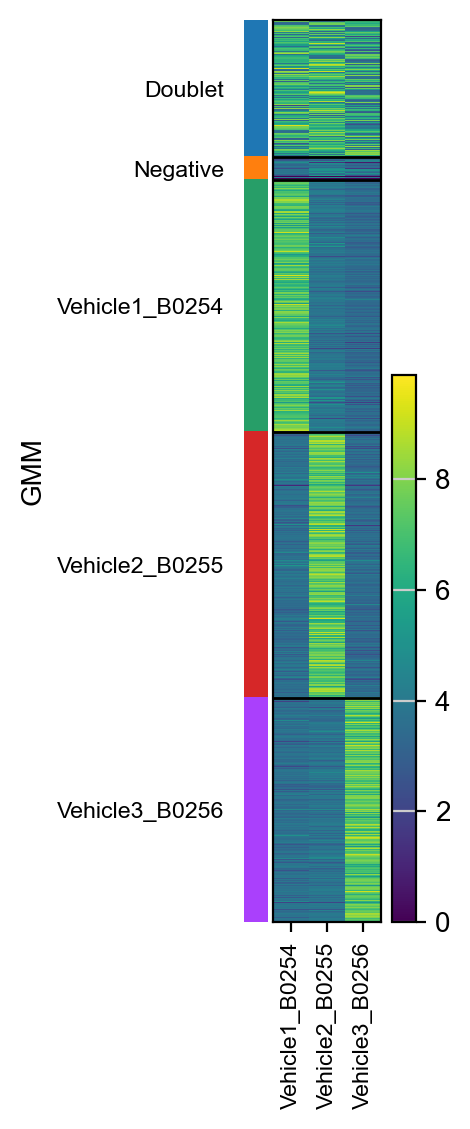

In [77]:
sc.pl.heatmap(adata, ['Vehicle1_B0254', 'Vehicle2_B0255', 'Vehicle3_B0256'], groupby="GMM", log=True)#, save = f"_{figName}_hash.png")

In [78]:
#singlets = [x in hto.var_names for x in adata.obs["Classification"] ]
#adata = adata[singlets,]

In [79]:
sc.pp.normalize_total(adata1,target_sum=1e4)

normalizing counts per cell
    finished (0:00:00)


In [80]:
sc.pp.log1p(adata1)

In [81]:
sc.pp.normalize_total(adata,target_sum=1e4)

normalizing counts per cell
    finished (0:00:00)


In [82]:
sc.pp.log1p(adata)

In [83]:
adata2 = adata

In [84]:
adata = an.concat([adata1,adata2], label="treatment", keys=["mrtx","veh"], join="outer",index_unique="-")
adata.var_names_make_unique()
adata.obs_names_make_unique()
adata

AnnData object with n_obs × n_vars = 8231 × 22236
    obs: 'MRTX1_B0251', 'MRTX2_B0252', 'MRTX3_B0253', 'n_genes', 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mm', 'pct_counts_mm', 'total_counts_mt', 'pct_counts_mt', 'most_likely_hypothesis', 'cluster_feature', 'negative_hypothesis_probability', 'singlet_hypothesis_probability', 'doublet_hypothesis_probability', 'Classification', 'GMM', 'Vehicle1_B0254', 'Vehicle2_B0255', 'Vehicle3_B0256', 'treatment'

In [85]:
resultsFileQC

'write/pdacPdxMrtx_QC.h5ad'

In [86]:
adata.write(resultsFileQC)

In [87]:
"PTPRC" in adata2.var_names

False